In [1]:
%load_ext autoreload
%autoreload 2

from energydiagram import ED
import matplotlib.pyplot as plt
from PIL import Image
params = {"font.family": "Arial", 'mathtext.default': 'regular'}      
plt.rc('font', size=8)
plt.rcParams.update(params)

%matplotlib inline

In [2]:
color = {'b': '#0099CC',
    'r': '#CC3500',
    'p': "#9E1EEE",
    'o': "#CC8200",
    'y': "#8C8500"}

In [3]:
def get_ED_positions(diagram, ax):
    dim = diagram.dimension
    space = diagram.space
    levels = range(1, len(set(diagram.positions))+1)
    starts = [level*(dim+space) for level in levels]
    ends = [start+dim for start in starts]
    midpoint = (ends[3]-starts[3])/2+starts[3]
    arrow_spacing = (dim+space)/2
    singlet_length = midpoint-1
    singlet_sections = (1+singlet_length/2-arrow_spacing, 1+singlet_length/2+arrow_spacing)
    triplet_length = ends[-1]-midpoint
    triplet_sections = (midpoint+triplet_length/2-arrow_spacing, midpoint+triplet_length/2+arrow_spacing)
    ed_dict = {"start": starts[0],
               "singlet_1": singlet_sections[0],
               "singlet_mid": singlet_sections[0]+arrow_spacing,
               "singlet_2": singlet_sections[1],
               "midpoint": midpoint,
               "triplet_1": triplet_sections[0],
               "triplet_mid": triplet_sections[0]+arrow_spacing,
               "triplet_2": triplet_sections[1],
              "end": ends[-1]}
    ax.annotate('', (ed_dict["singlet_1"], -0.2), (ed_dict["start"], -0.2), arrowprops=dict(arrowstyle="<-")),
    ax.annotate('', (ed_dict["midpoint"], -0.2), (ed_dict["singlet_2"], -0.2), arrowprops=dict(arrowstyle="->")),
    ax.text(ed_dict["singlet_mid"], -0.2, 'singlet manifold', ha='center', va='center')
    ax.annotate('', (ed_dict["triplet_1"], -0.2), (ed_dict["midpoint"], -0.2), arrowprops=dict(arrowstyle="<-")),
    ax.annotate('', (ed_dict["end"], -0.2), (ed_dict["triplet_2"], -0.2), arrowprops=dict(arrowstyle="->")),
    ax.text(ed_dict["triplet_mid"], -0.2, 'triplet manifold', ha='center', va='center')

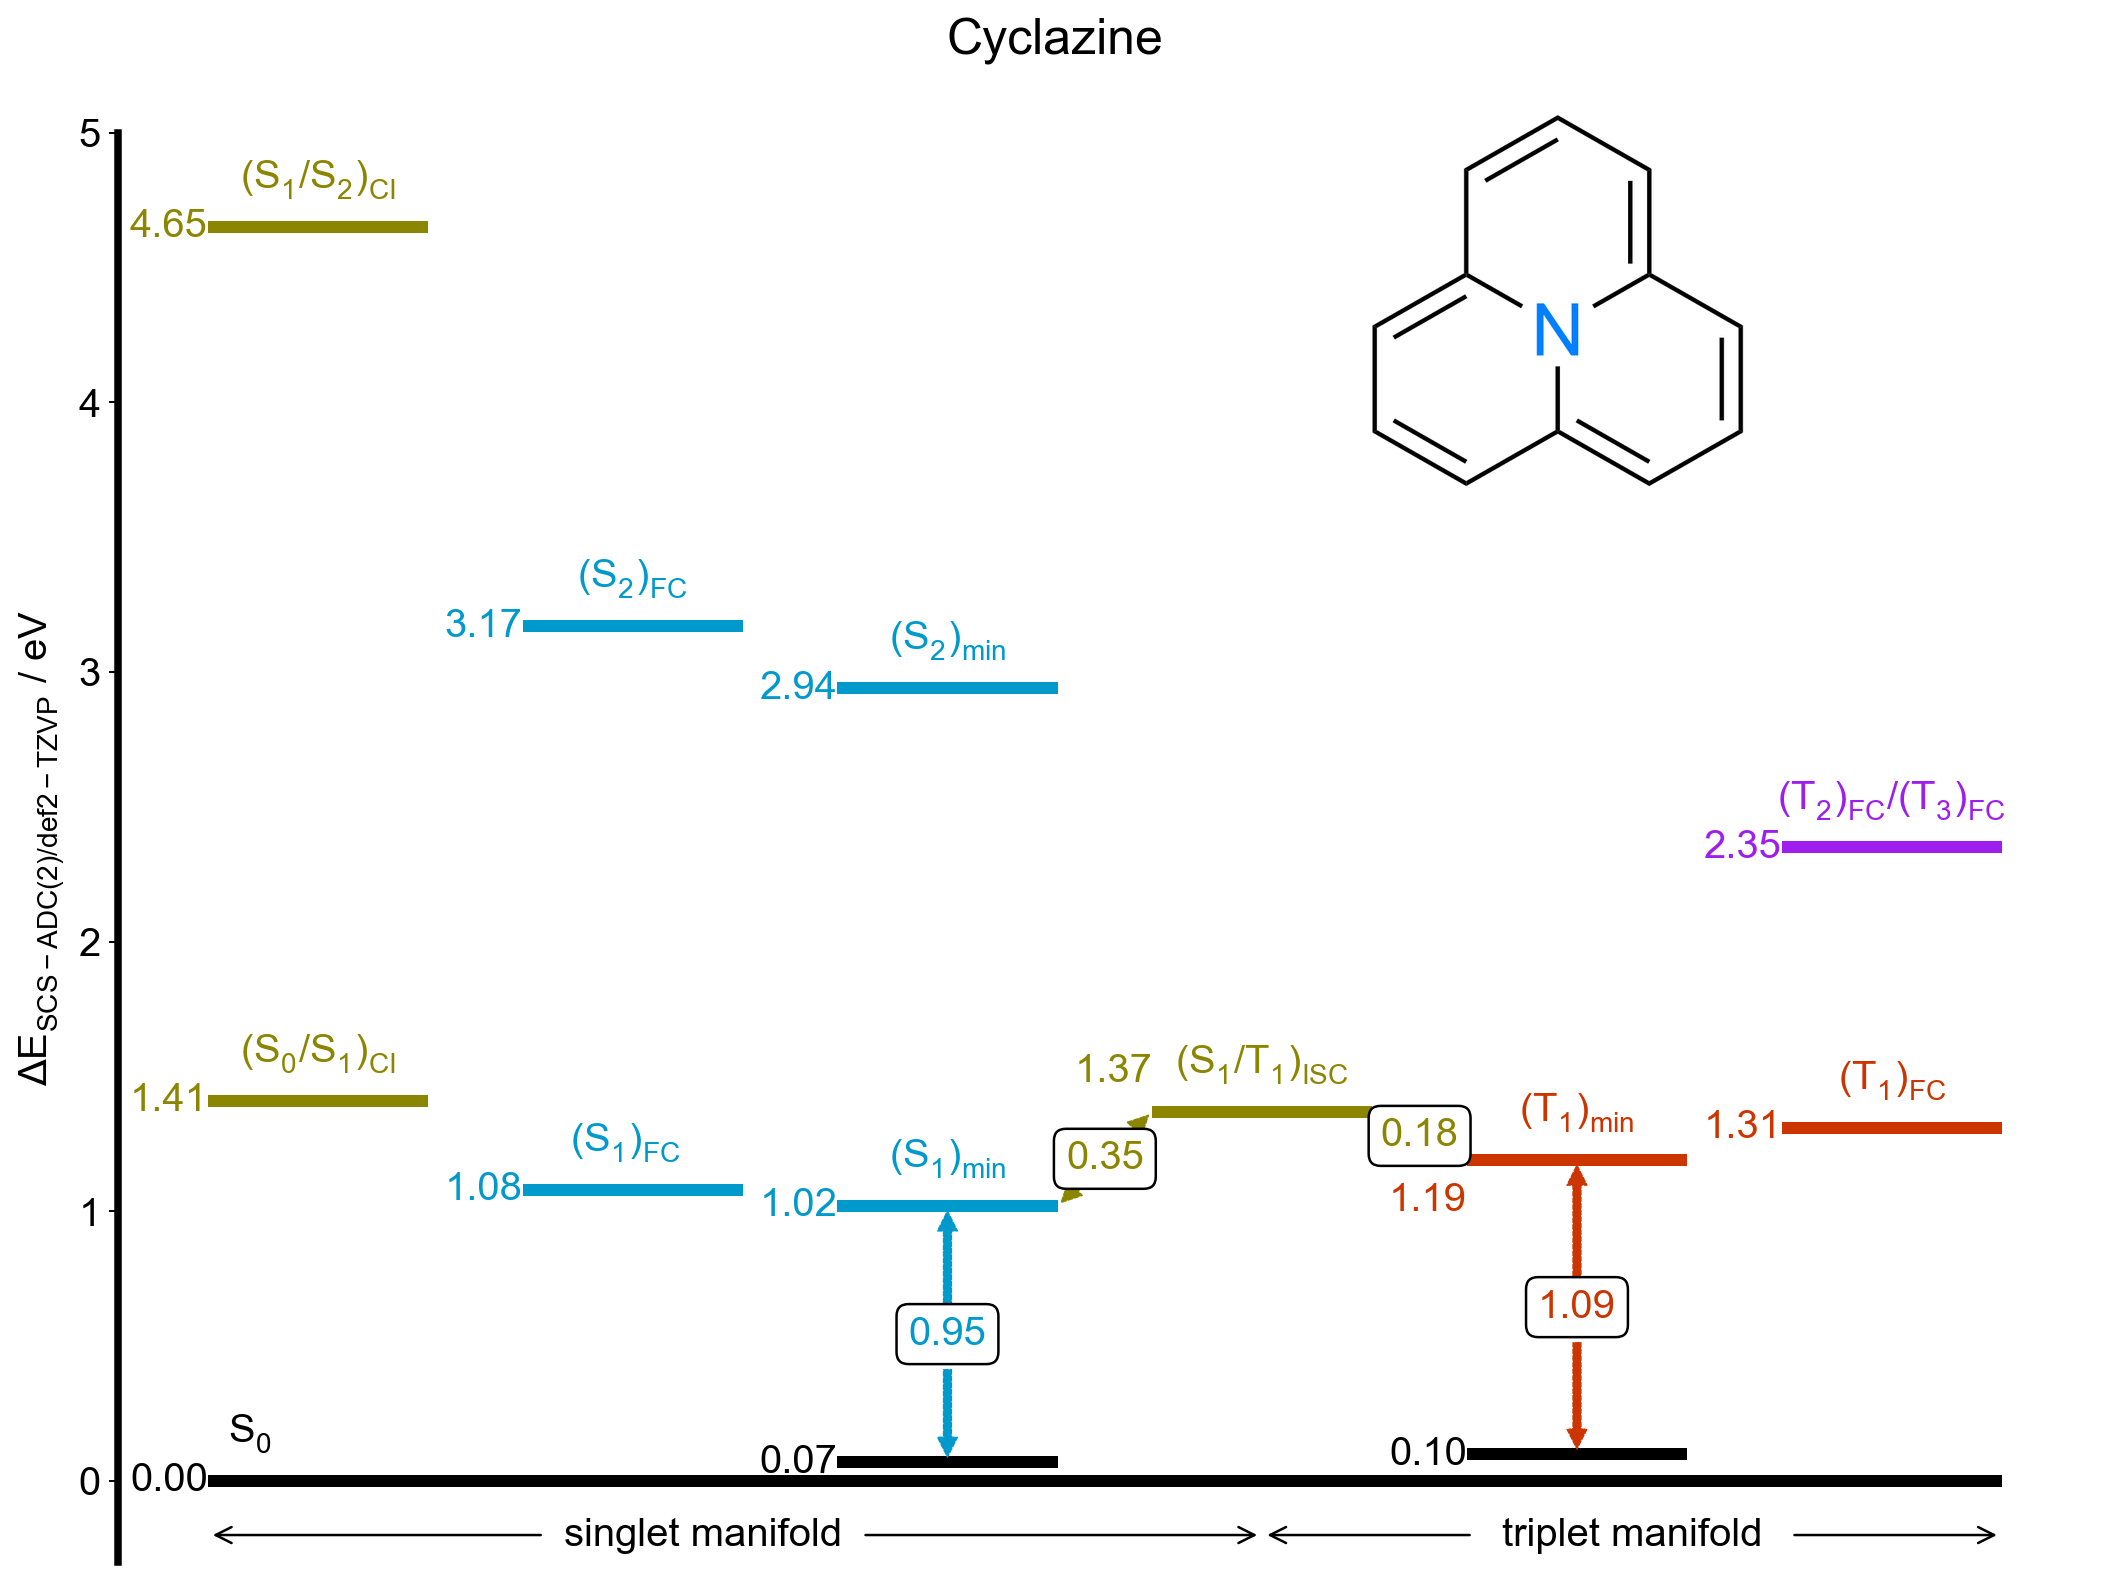

In [9]:
# Cyclazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 0.89,
              "S2FC": 2.76,
              "T1FC": 0.97,
              "T2FC": 1.96,
              "T3FC": 1.96,
              "S1min": 0.87,
              "T1min": 0.92,
              "S2min": 2.67,
              "S1/T1-ISC": 0.98,
              "S0/S1-CI": 1.30,
              "S1/S2-CI": 3.77,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 1.08,
              "S2FC": 3.17,
              "T1FC": 1.31,
              "T2FC": 2.35,
              "T3FC": 2.35,
              "S1min": 1.02,
              "T1min": 1.19,
              "S2min": 2.94,
              "S1/T1-ISC": 1.37,
              "S0/S1-CI": 1.41,
              "S1/S2-CI": 4.65,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=180)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Cyclazine', size=20)
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E_{SCS-ADC(2)/def2-TZVP}$ / $eV$", ax=ax, show_IDs=False)
ax.set_ylim(-0.3, 5)
ax.set_aspect('auto')
x0, y0 = ax.transData.transform((0.65,3.5))
img = Image.open('./cyclazine.png')
img = img.resize((400, 400), Image.ANTIALIAS)
ax.figure.figimage(img,x0,y0, alpha=1)
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax)

fig.savefig('adconly-cyclazine.png', facecolor='white', transparent=False, bbox_inches='tight')

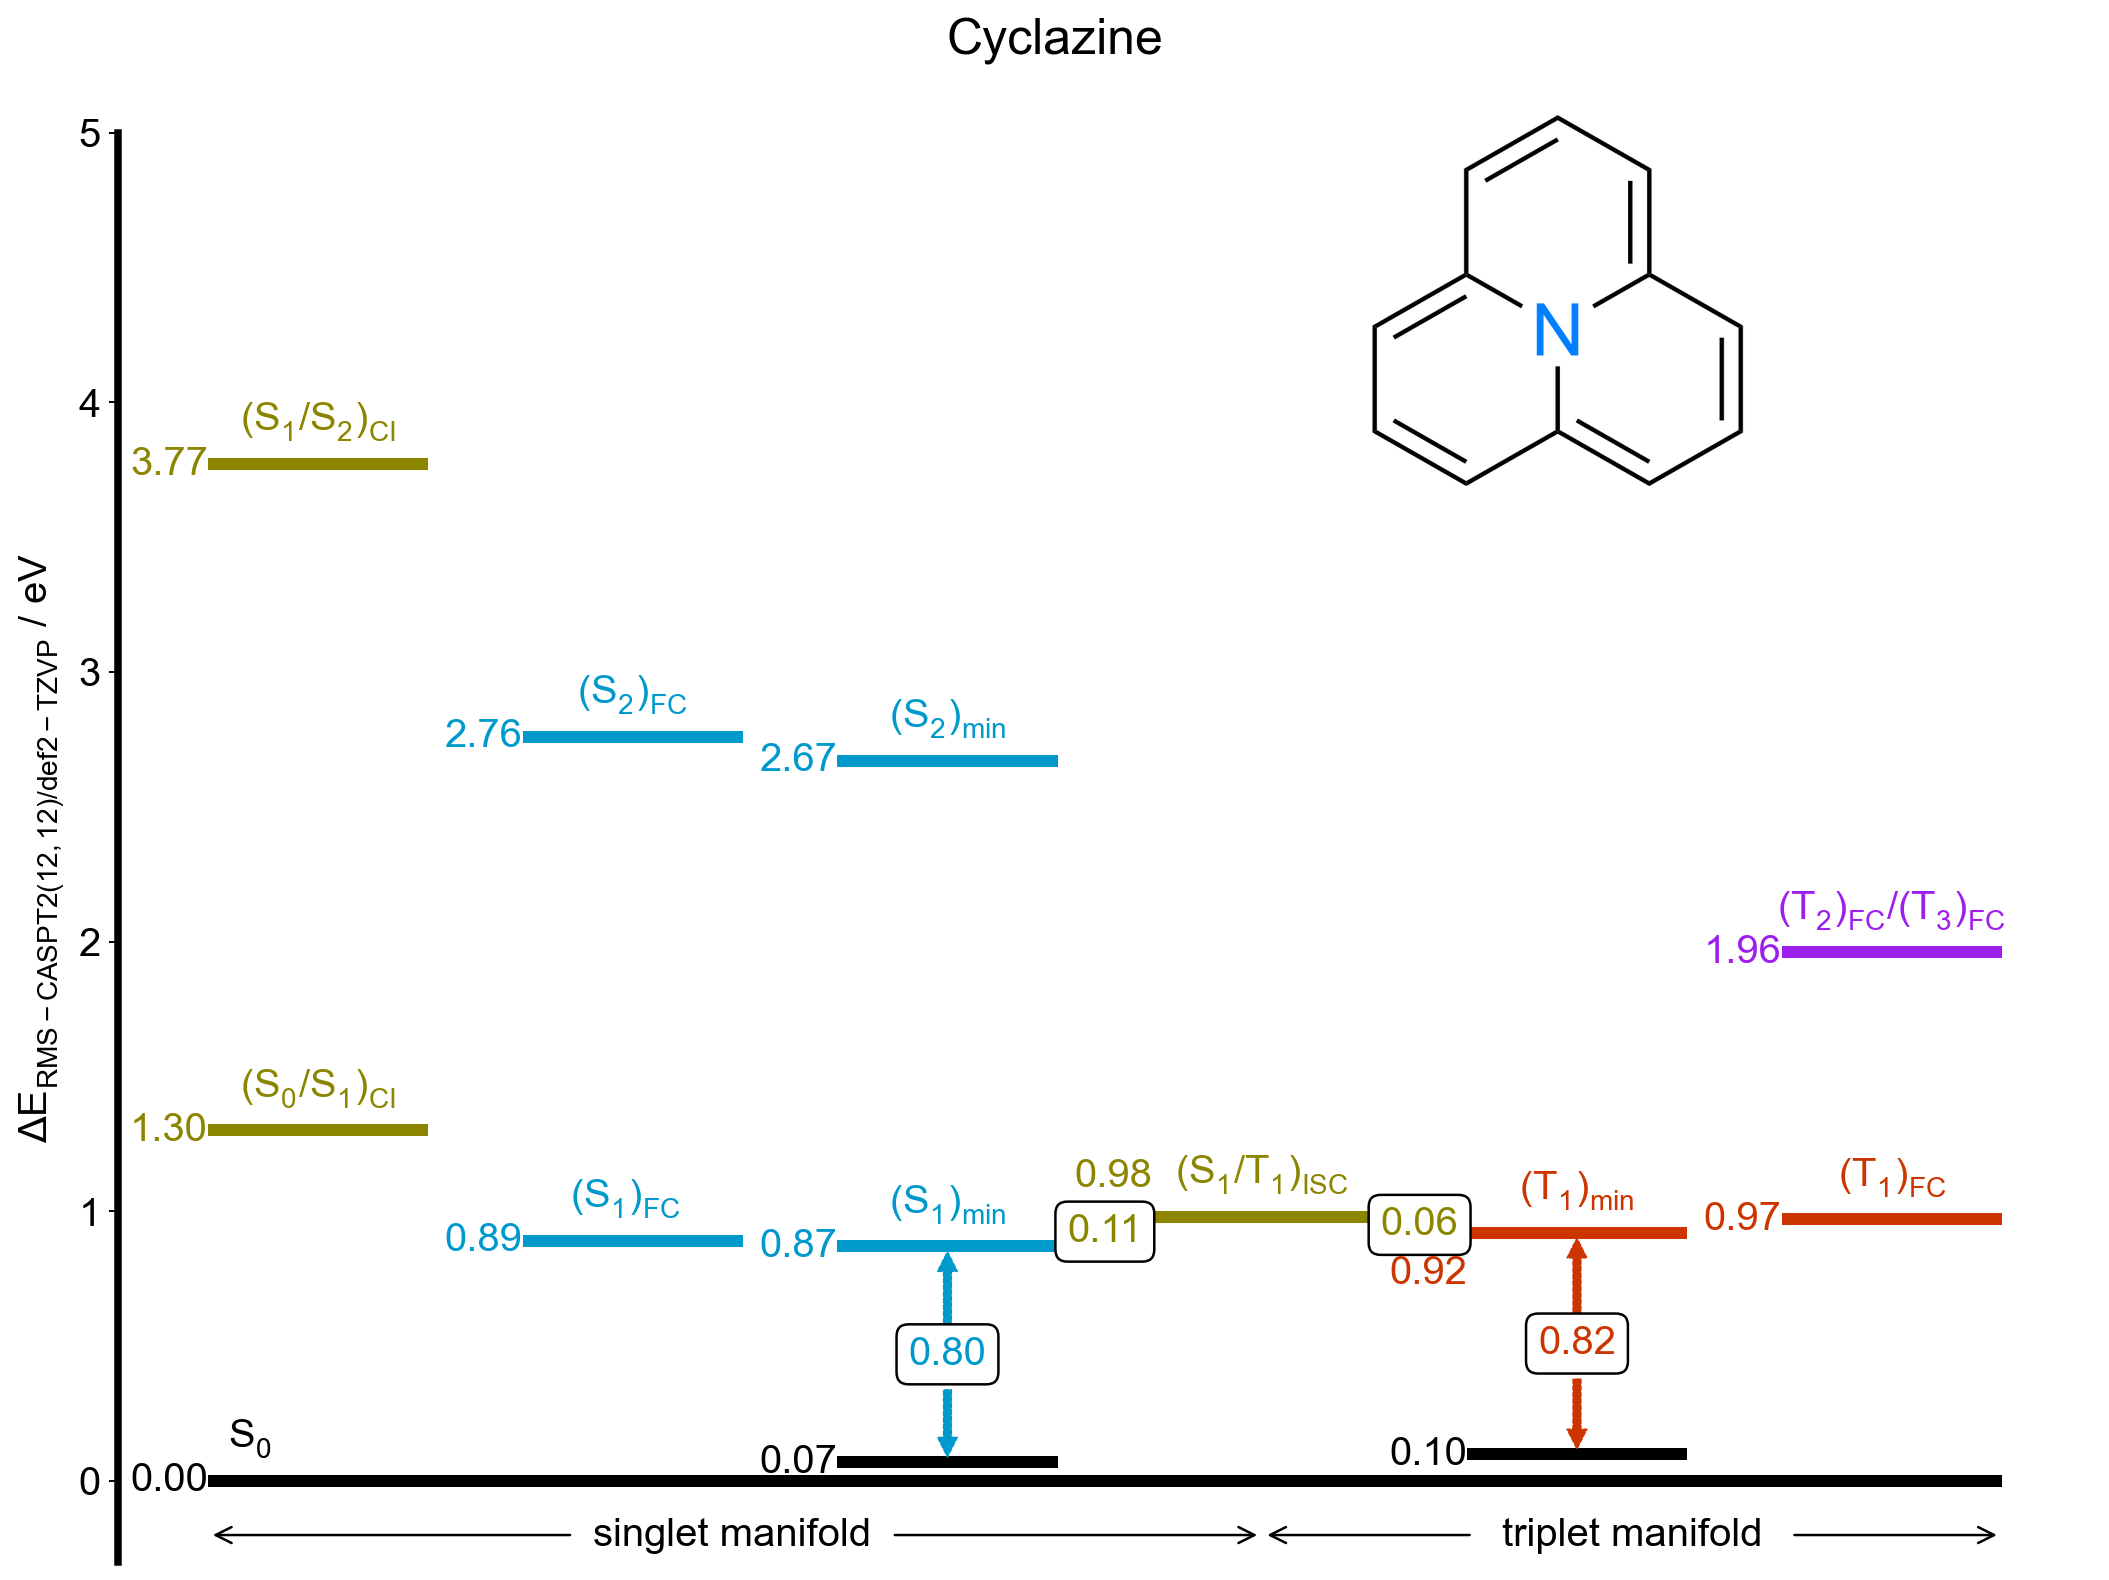

In [8]:
# Cyclazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 0.89,
              "S2FC": 2.76,
              "T1FC": 0.97,
              "T2FC": 1.96,
              "T3FC": 1.96,
              "S1min": 0.87,
              "T1min": 0.92,
              "S2min": 2.67,
              "S1/T1-ISC": 0.98,
              "S0/S1-CI": 1.30,
              "S1/S2-CI": 3.77,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 1.08,
              "S2FC": 3.17,
              "T1FC": 1.31,
              "T2FC": 2.35,
              "T3FC": 2.35,
              "S1min": 1.02,
              "T1min": 1.19,
              "S2min": 2.94,
              "S1/T1-ISC": 1.37,
              "S0/S1-CI": 1.41,
              "S1/S2-CI": 4.65,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{rms_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{rms_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{rms_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=180)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Cyclazine', size=20)
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E_{RMS-CASPT2(12,12)/def2-TZVP}$ / $eV$", ax=ax, show_IDs=False)
ax.set_ylim(-0.3, 5)
ax.set_aspect('auto')
x0, y0 = ax.transData.transform((0.65,3.5))
img = Image.open('./cyclazine.png')
img = img.resize((400, 400), Image.ANTIALIAS)
ax.figure.figimage(img,x0,y0, alpha=1)
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax)

fig.savefig('rmsonly-cyclazine.png', facecolor='white', transparent=False, bbox_inches='tight')

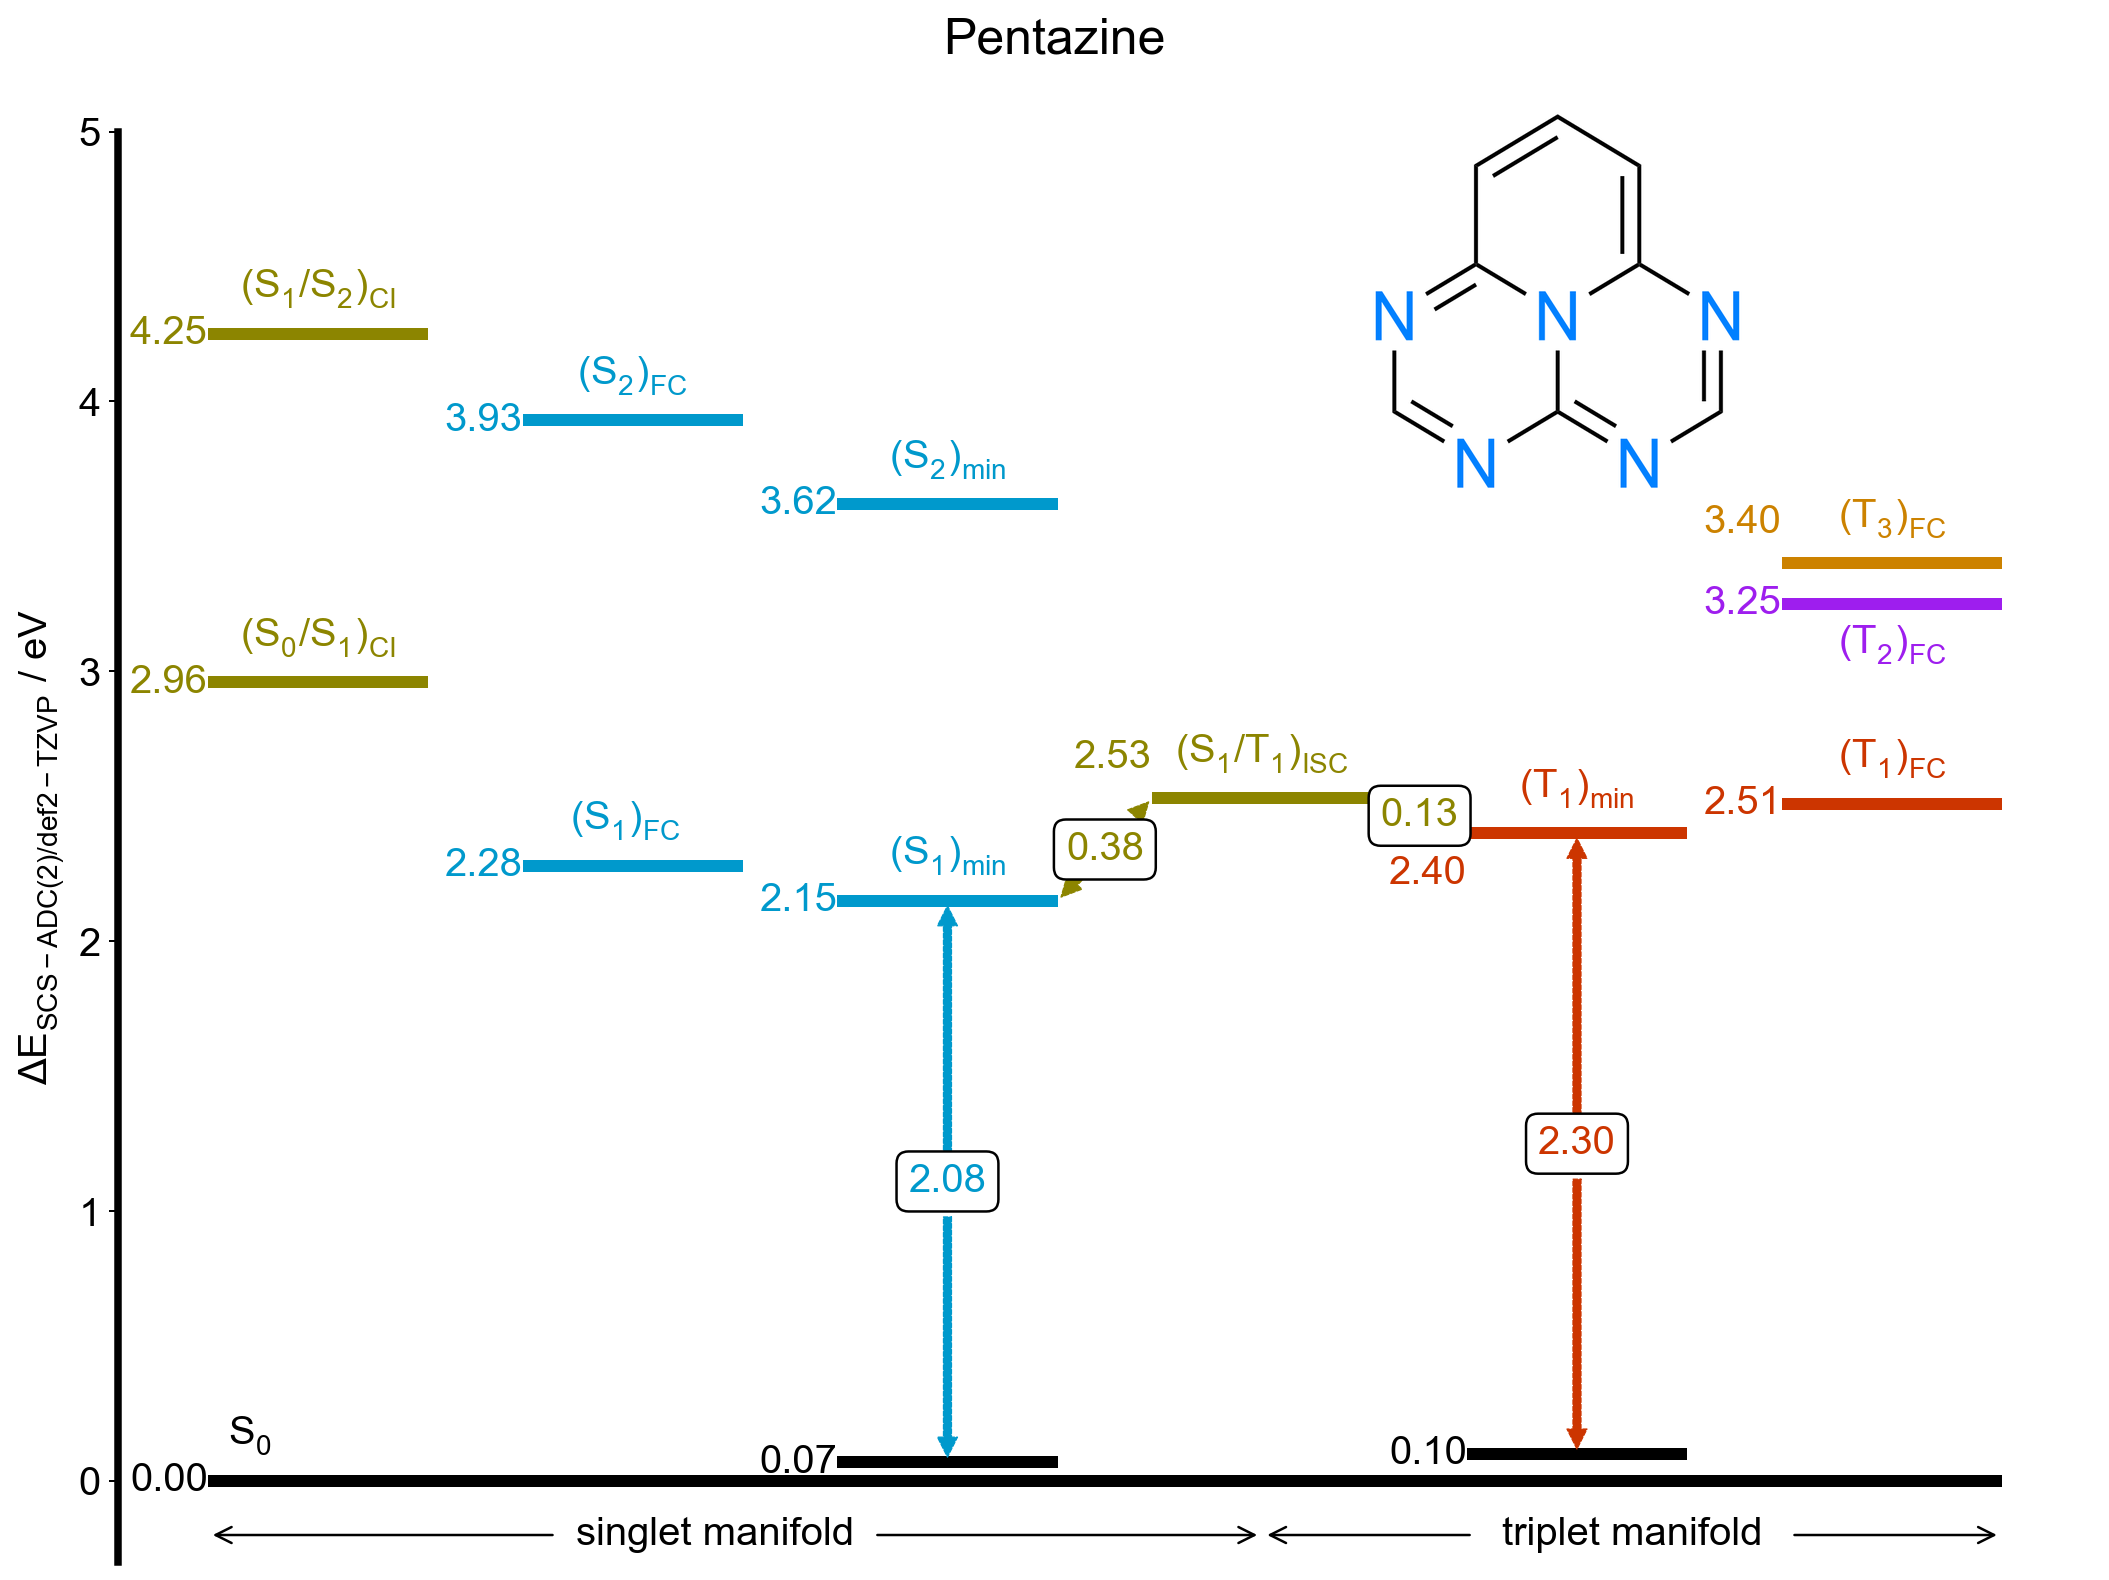

In [10]:
# Pentazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 2.00,
              "S2FC": 3.36,
              "T1FC": 2.08,
              "T2FC": 2.75,
              "T3FC": 2.92,
              "S1min": 1.89,
              "T1min": 1.97,
              "S2min": 3.15,
              "S1/T1-ISC": 2.07,
              "S0/S1-CI": 2.77,
              "S1/S2-CI": 5.00,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 2.28,
              "S2FC": 3.93,
              "T1FC": 2.51,
              "T2FC": 3.25,
              "T3FC": 3.40,
              "S1min": 2.15,
              "T1min": 2.40,
              "S2min": 3.62,
              "S1/T1-ISC": 2.53,
              "S0/S1-CI": 2.96,
              "S1/S2-CI": 4.25,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text='', bottom_text=r'$(T_2)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0, bottom_offset=0.1)
rms_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,18, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=180)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Pentazine', size=20)
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E_{SCS-ADC(2)/def2-TZVP}$ / $eV$", ax=ax, show_IDs=False)
ax.set_ylim(-0.3, 5)
ax.set_aspect('auto')
x0, y0 = ax.transData.transform((0.65,3.5))
img = Image.open('./pentazine.png')
img = img.resize((400, 400), Image.ANTIALIAS)
ax.figure.figimage(img,x0,y0, alpha=1)
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax)

fig.savefig('adconly-pentazine.png', facecolor='white', transparent=False, bbox_inches='tight')

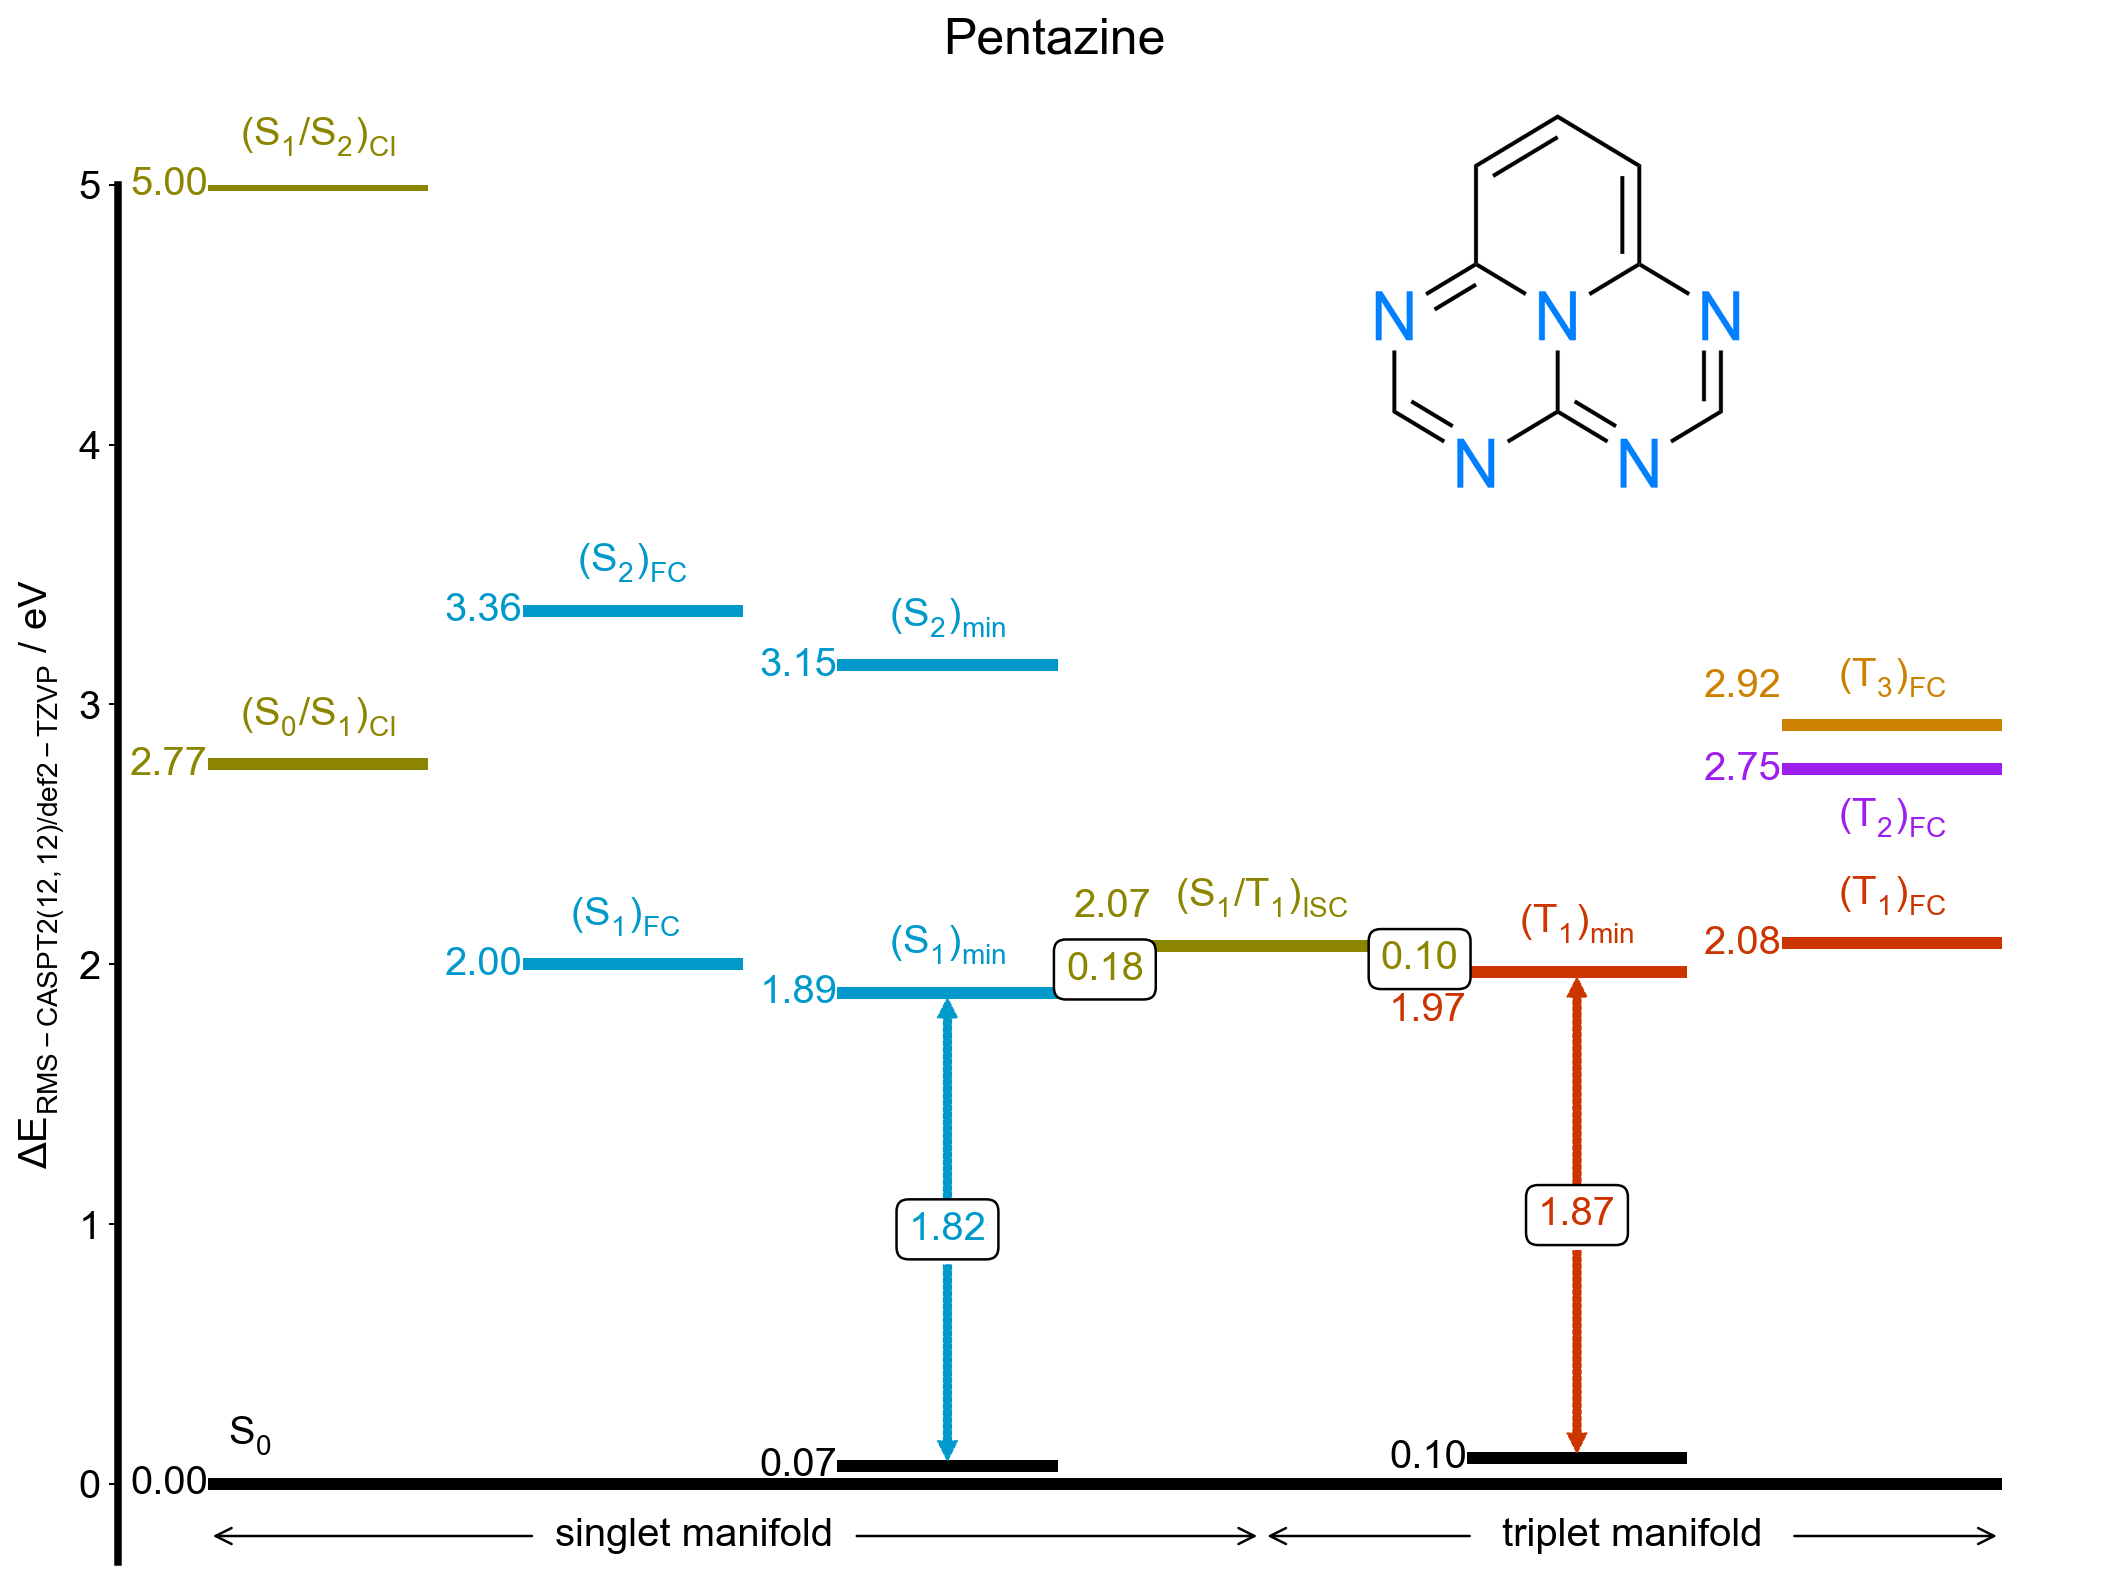

In [25]:
# Pentazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 2.00,
              "S2FC": 3.36,
              "T1FC": 2.08,
              "T2FC": 2.75,
              "T3FC": 2.92,
              "S1min": 1.89,
              "T1min": 1.97,
              "S2min": 3.15,
              "S1/T1-ISC": 2.07,
              "S0/S1-CI": 2.77,
              "S1/S2-CI": 5.00,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 2.28,
              "S2FC": 3.93,
              "T1FC": 2.51,
              "T2FC": 3.25,
              "T3FC": 3.40,
              "S1min": 2.15,
              "T1min": 2.40,
              "S2min": 3.62,
              "S1/T1-ISC": 2.53,
              "S0/S1-CI": 2.96,
              "S1/S2-CI": 4.25,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{rms_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{rms_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{rms_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text='', bottom_text=r'$(T_2)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0, bottom_offset=0.1)
rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,18, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=180)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Pentazine', size=20)
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E_{RMS-CASPT2(12,12)/def2-TZVP}$ / $eV$", ax=ax, show_IDs=False)
ax.set_ylim(-0.3, 5)
ax.set_aspect('auto')
x0, y0 = ax.transData.transform((0.65,3.5))
img = Image.open('./pentazine.png')
img = img.resize((400, 400), Image.ANTIALIAS)
ax.figure.figimage(img,x0,y0, alpha=1)
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax)

fig.savefig('rmsonly-pentazine.png', facecolor='white', transparent=False, bbox_inches='tight')

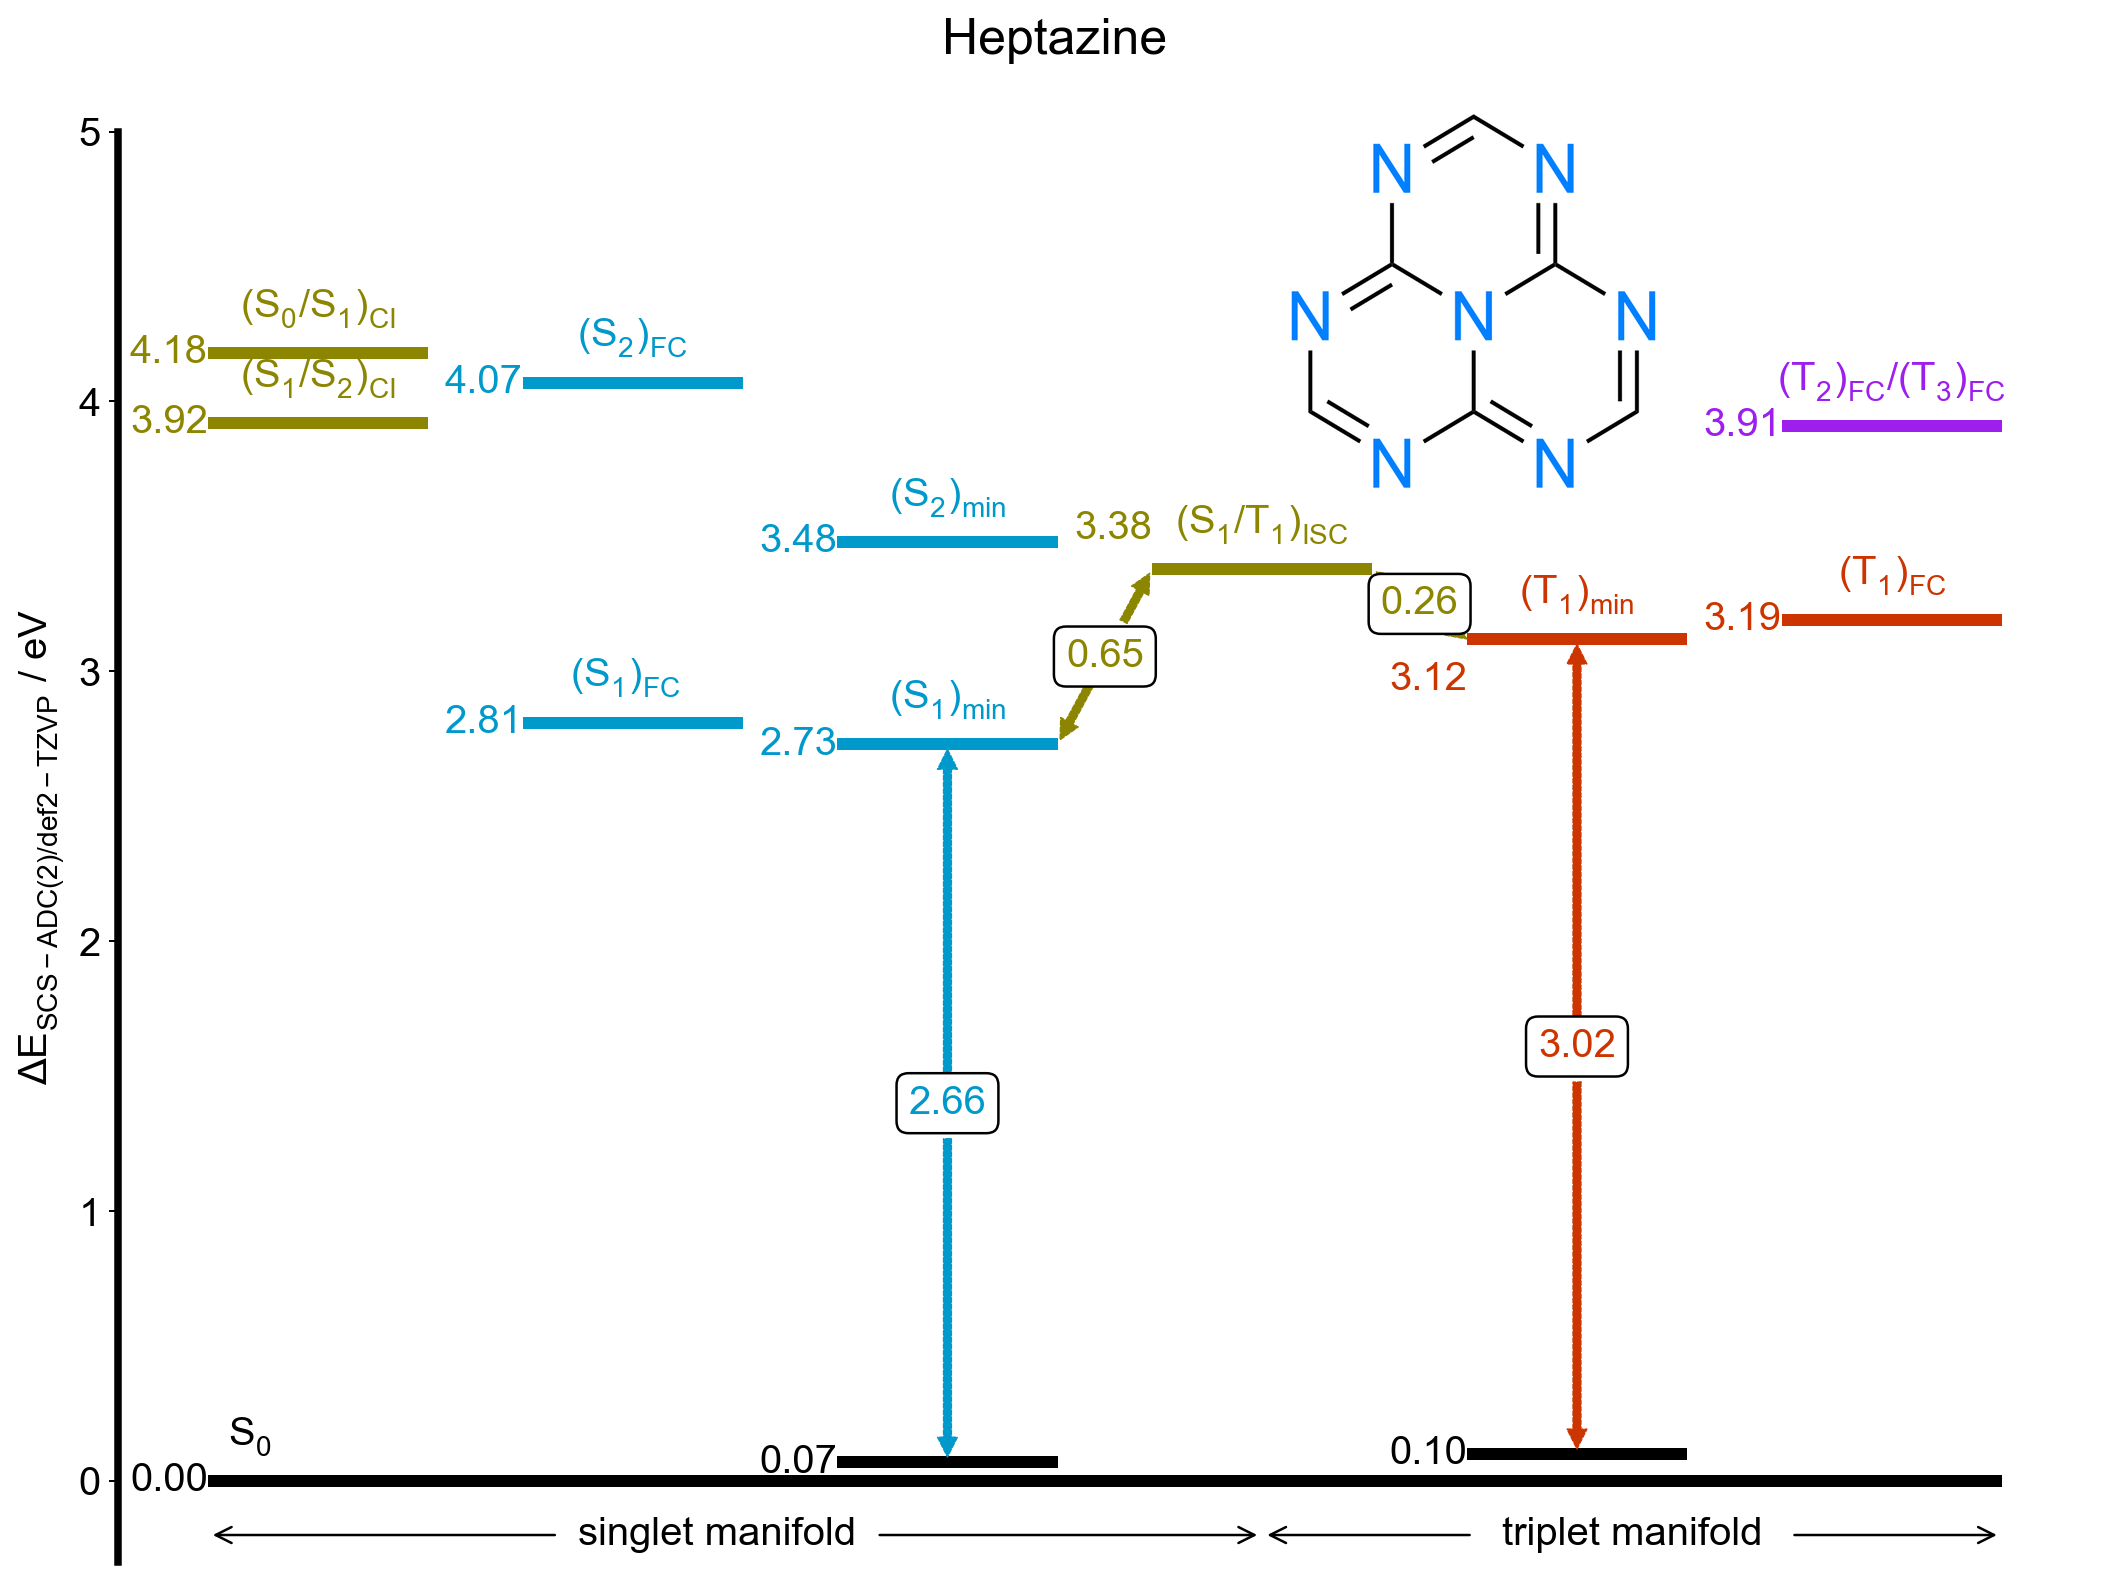

In [13]:
# Heptazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 2.50,
              "S2FC": 3.99,
              "T1FC": 2.70,
              "T2FC": 3.35,
              "T3FC": 3.35,
              "S1min": 2.43,
              "T1min": 2.65,
              "S2min": 3.49,
              "S1/T1-ISC": 3.01,
              "S0/S1-CI": 4.42,
              "S1/S2-CI": 5.00,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 2.81,
              "S2FC": 4.07,
              "T1FC": 3.19,
              "T2FC": 3.91,
              "T3FC": 3.91,
              "S1min": 2.73,
              "T1min": 3.12,
              "S2min": 3.48,
              "S1/T1-ISC": 3.38,
              "S0/S1-CI": 4.18,
              "S1/S2-CI": 3.92,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=180)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Heptazine', size=20)
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E_{SCS-ADC(2)/def2-TZVP}$ / $eV$", ax=ax, show_IDs=False)
ax.set_ylim(-0.3, 5)
ax.set_aspect('auto')
x0, y0 = ax.transData.transform((0.6,3.5))
img = Image.open('./heptazine.png')
img = img.resize((400, 400), Image.ANTIALIAS)
ax.figure.figimage(img,x0,y0, alpha=1)
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax)

fig.savefig('adconly-heptazine.png', facecolor='white', transparent=False, bbox_inches='tight')

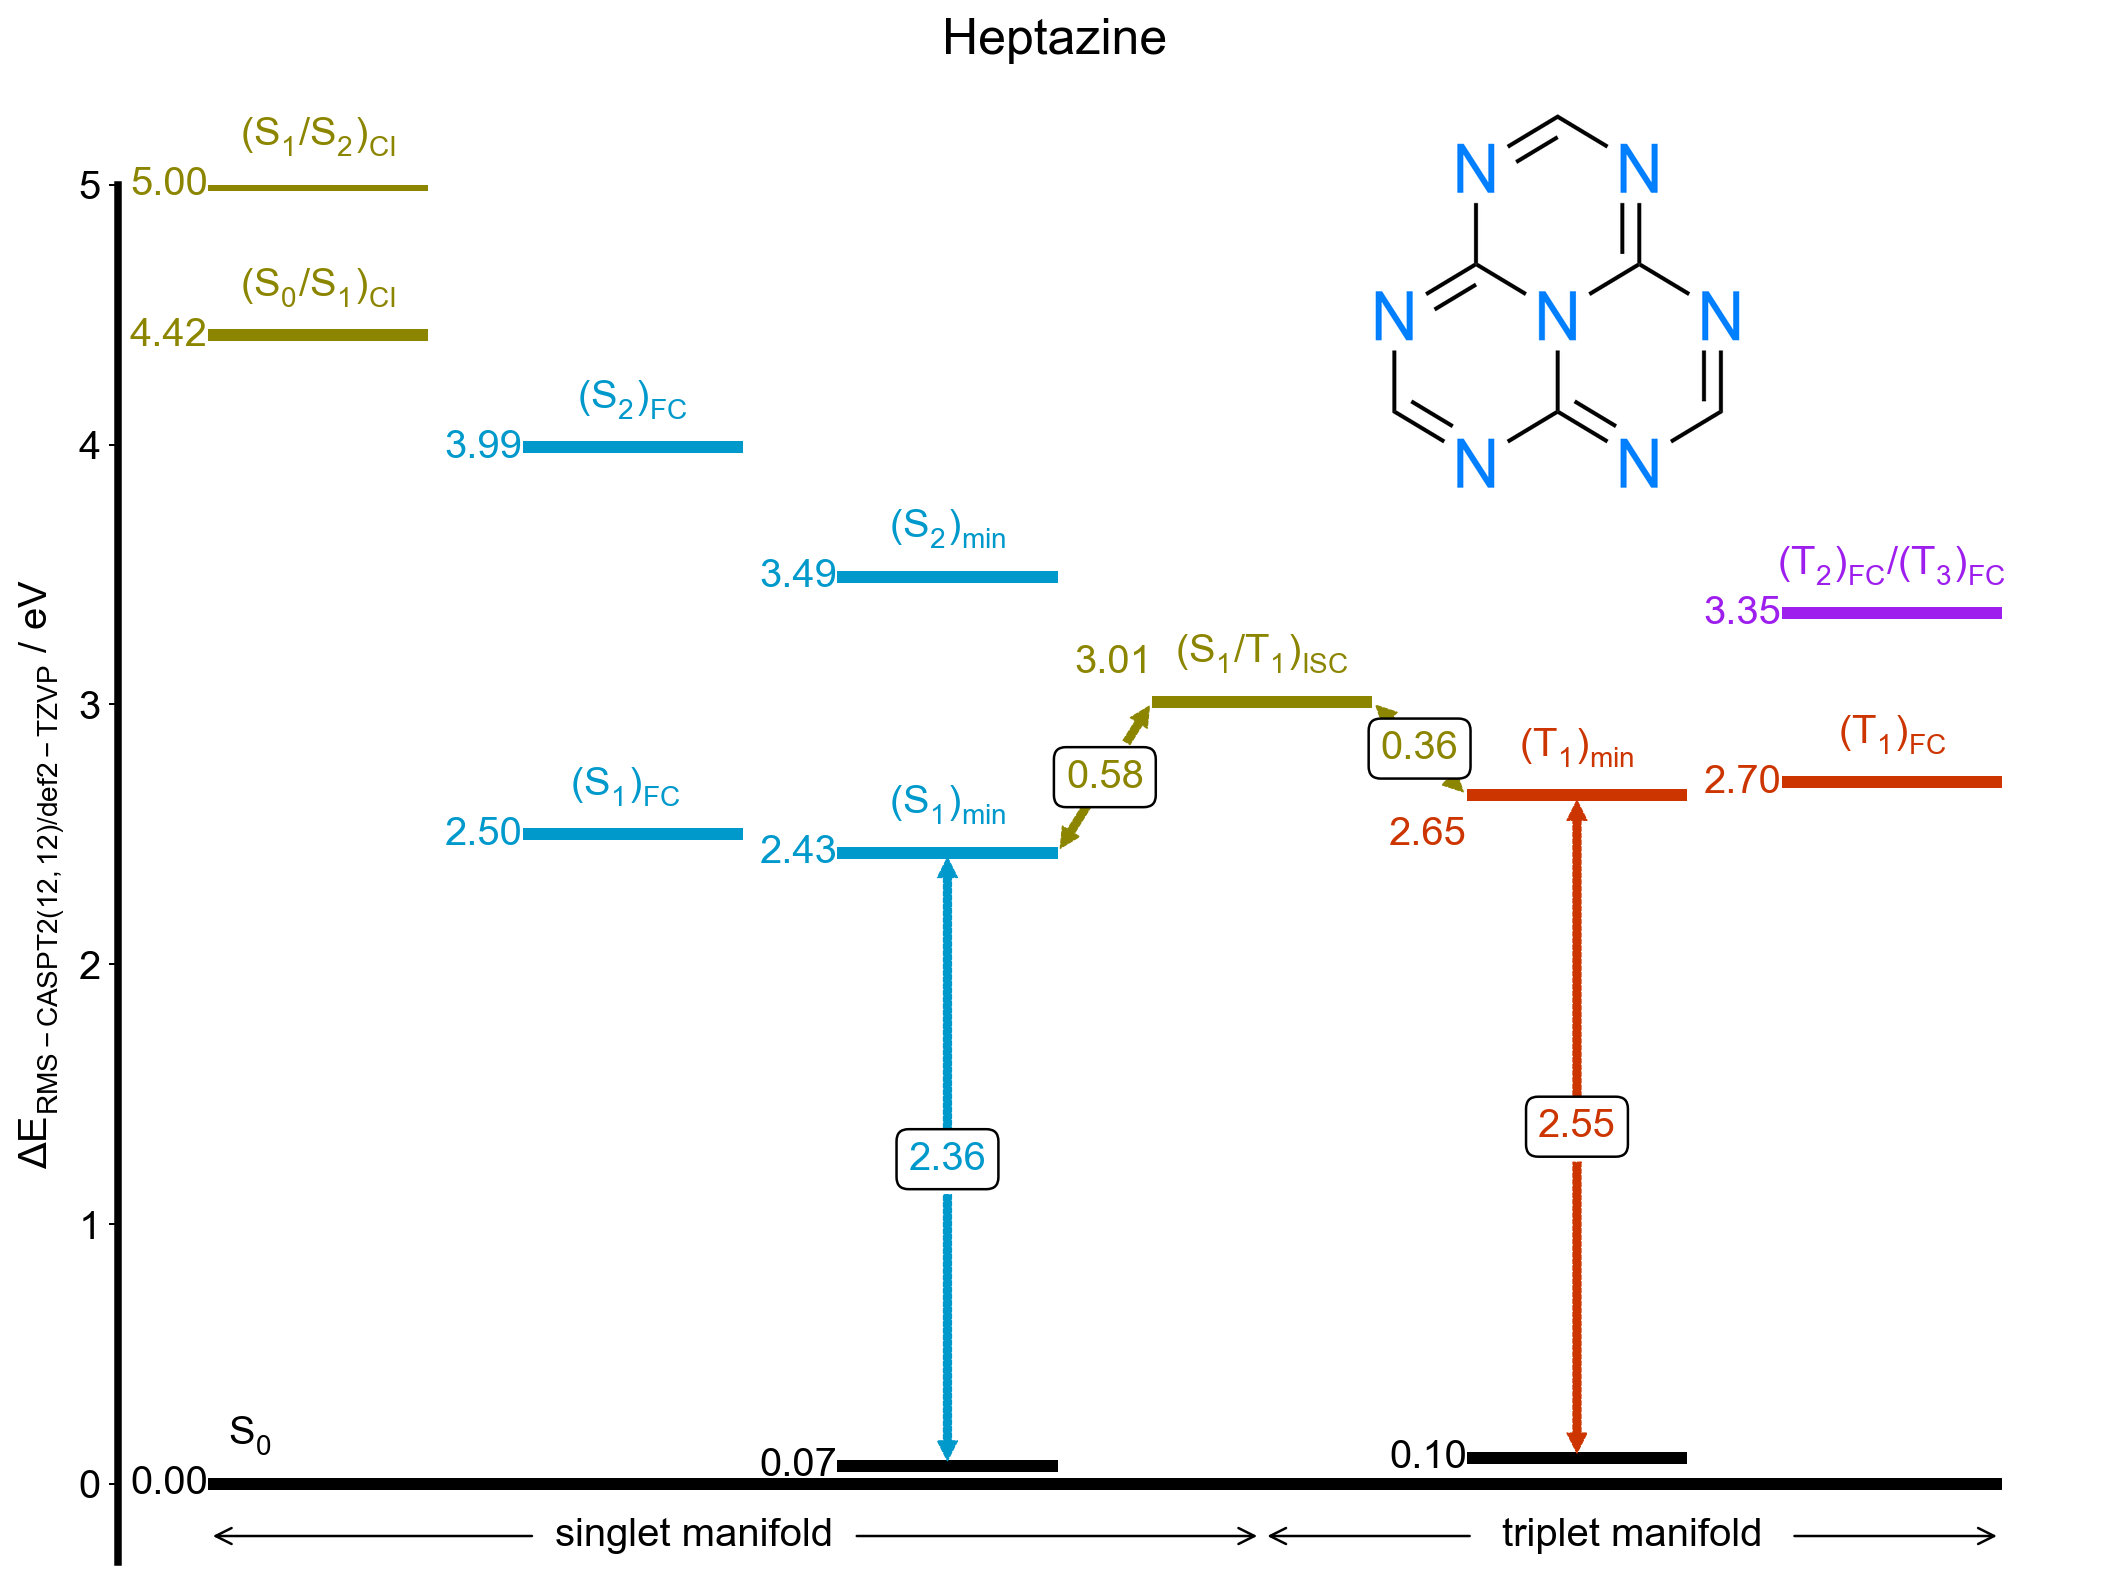

In [26]:
# Heptazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 2.50,
              "S2FC": 3.99,
              "T1FC": 2.70,
              "T2FC": 3.35,
              "T3FC": 3.35,
              "S1min": 2.43,
              "T1min": 2.65,
              "S2min": 3.49,
              "S1/T1-ISC": 3.01,
              "S0/S1-CI": 4.42,
              "S1/S2-CI": 5.00,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 2.81,
              "S2FC": 4.07,
              "T1FC": 3.19,
              "T2FC": 3.91,
              "T3FC": 3.91,
              "S1min": 2.73,
              "T1min": 3.12,
              "S2min": 3.48,
              "S1/T1-ISC": 3.38,
              "S0/S1-CI": 4.18,
              "S1/S2-CI": 3.92,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{rms_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{rms_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{rms_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=180)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Heptazine', size=20)
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E_{RMS-CASPT2(12,12)/def2-TZVP}$ / $eV$", ax=ax, show_IDs=False)
ax.set_ylim(-0.3, 5)
ax.set_aspect('auto')
x0, y0 = ax.transData.transform((0.65,3.5))
img = Image.open('./heptazine.png')
img = img.resize((400, 400), Image.ANTIALIAS)
ax.figure.figimage(img,x0,y0, alpha=1)
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax)

fig.savefig('rmsonly-heptazine.png', facecolor='white', transparent=False, bbox_inches='tight')

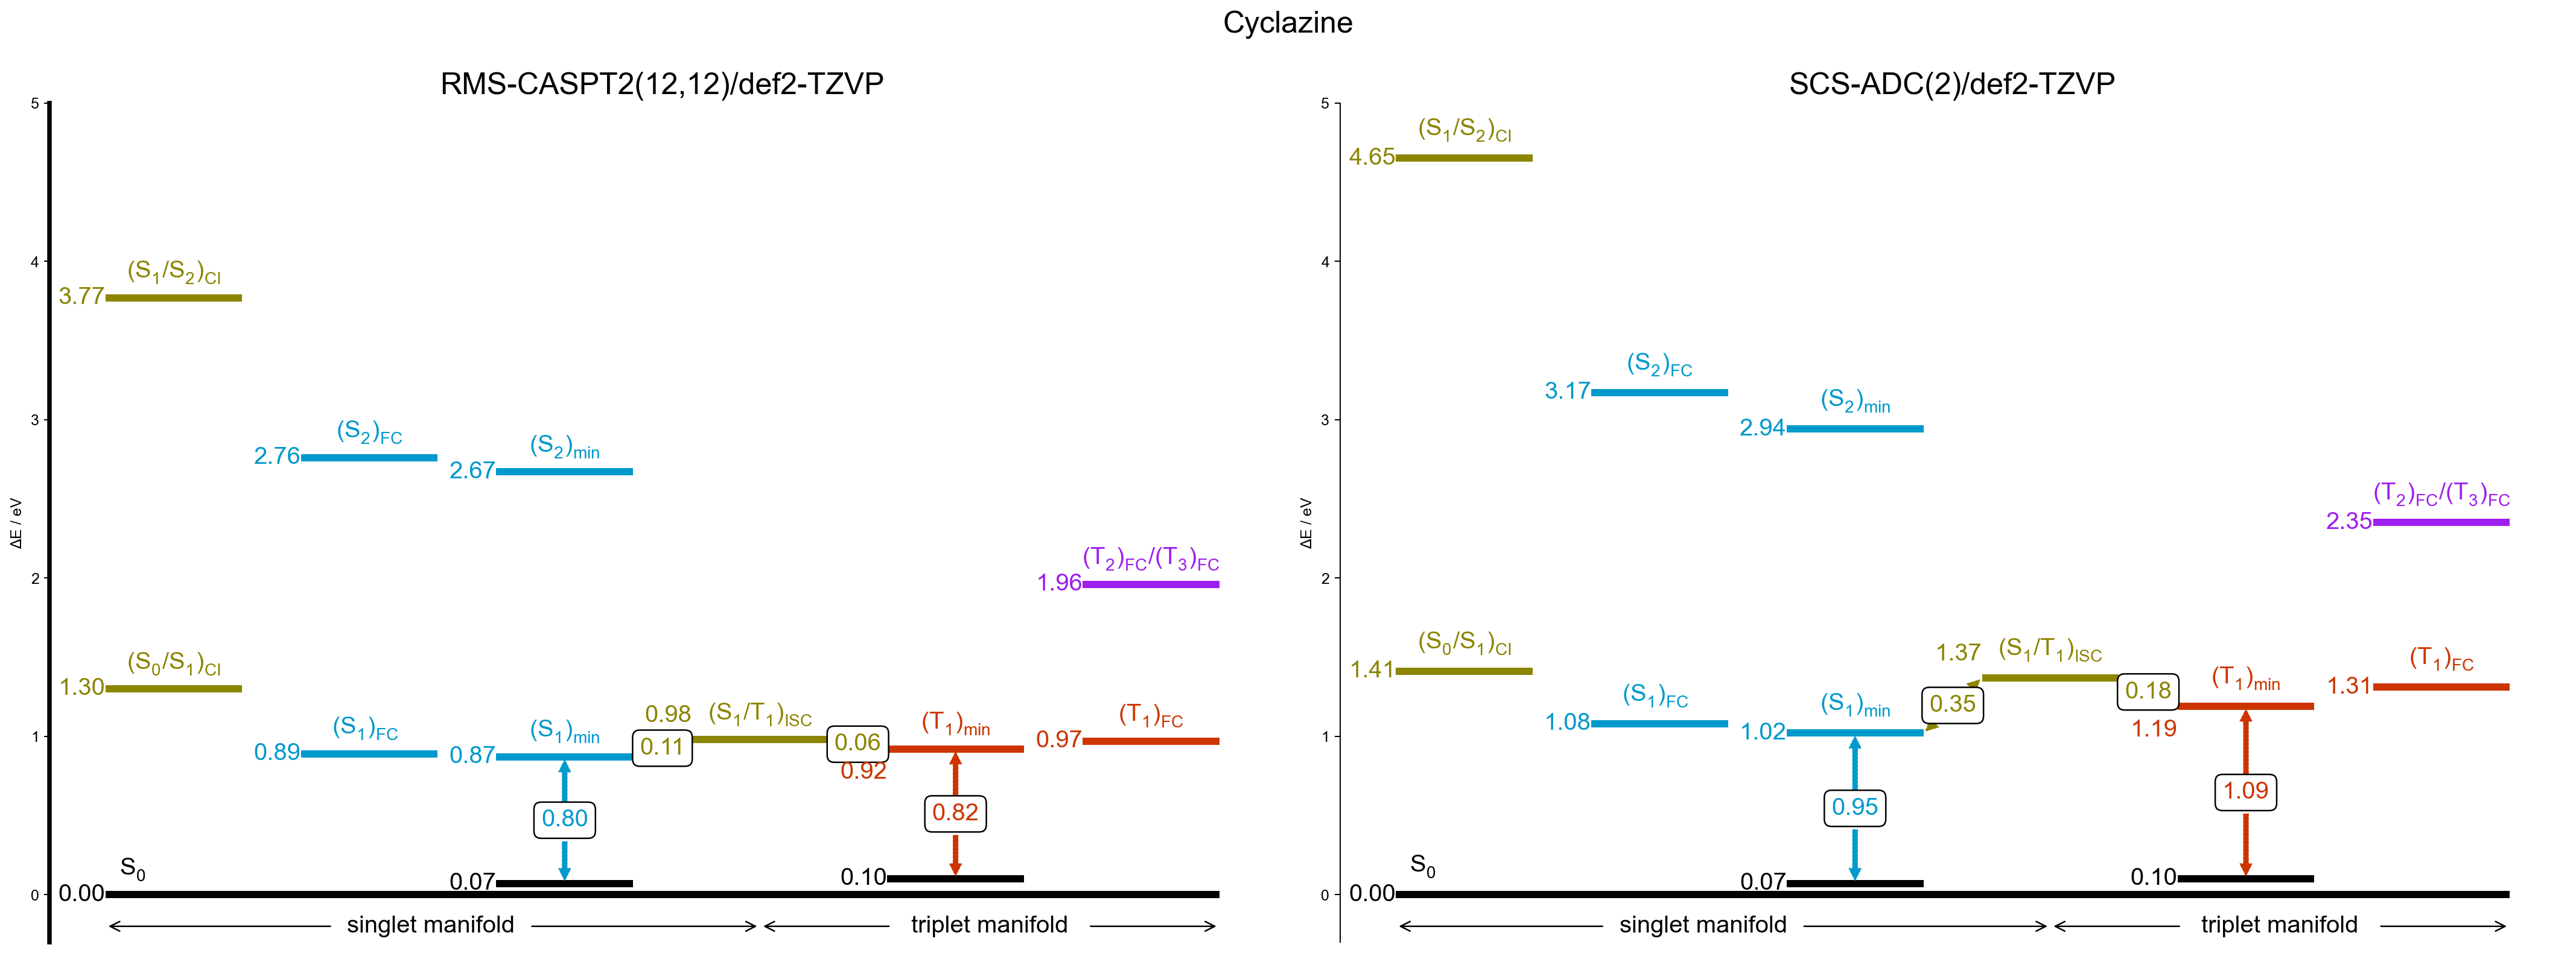

In [4]:
# Cyclazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 0.89,
              "S2FC": 2.76,
              "T1FC": 0.97,
              "T2FC": 1.96,
              "T3FC": 1.96,
              "S1min": 0.87,
              "T1min": 0.92,
              "S2min": 2.67,
              "S1/T1-ISC": 0.98,
              "S0/S1-CI": 1.30,
              "S1/S2-CI": 3.77,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 1.08,
              "S2FC": 3.17,
              "T1FC": 1.31,
              "T2FC": 2.35,
              "T3FC": 2.35,
              "S1min": 1.02,
              "T1min": 1.19,
              "S2min": 2.94,
              "S1/T1-ISC": 1.37,
              "S0/S1-CI": 1.41,
              "S1/S2-CI": 4.65,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{rms_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{rms_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{rms_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')


scsadc2_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#scsadc2_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



scsadc2_diagram.add_link(2,5, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(5,9, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(9,10, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(10,14, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(14,17, ls='-', linewidth=4.8)

scsadc2_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
scsadc2_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 2, figsize=(24,9), dpi=180)
plt.setp(ax[0].spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Cyclazine', size=20)
ax[0].set_title('RMS-CASPT2(12,12)/def2-TZVP')
ax[1].set_title('SCS-ADC(2)/def2-TZVP')
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[0], show_IDs=False)
scsadc2_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[1], show_IDs=False)
ax[0].set_ylim(-0.3, 5)
ax[0].set_aspect('auto')
ax[1].set_ylim(-0.3, 5)
ax[1].set_aspect('auto')
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax[0])
scsadc2_dict = get_ED_positions(scsadc2_diagram, ax[1])

fig.savefig('ws2-cyclazine.png', facecolor='white', transparent=False, bbox_inches='tight')

In [102]:
scsadc2_diagram.dimension

0.8778192499999999

In [103]:
scsadc2_diagram.space

0.37620825

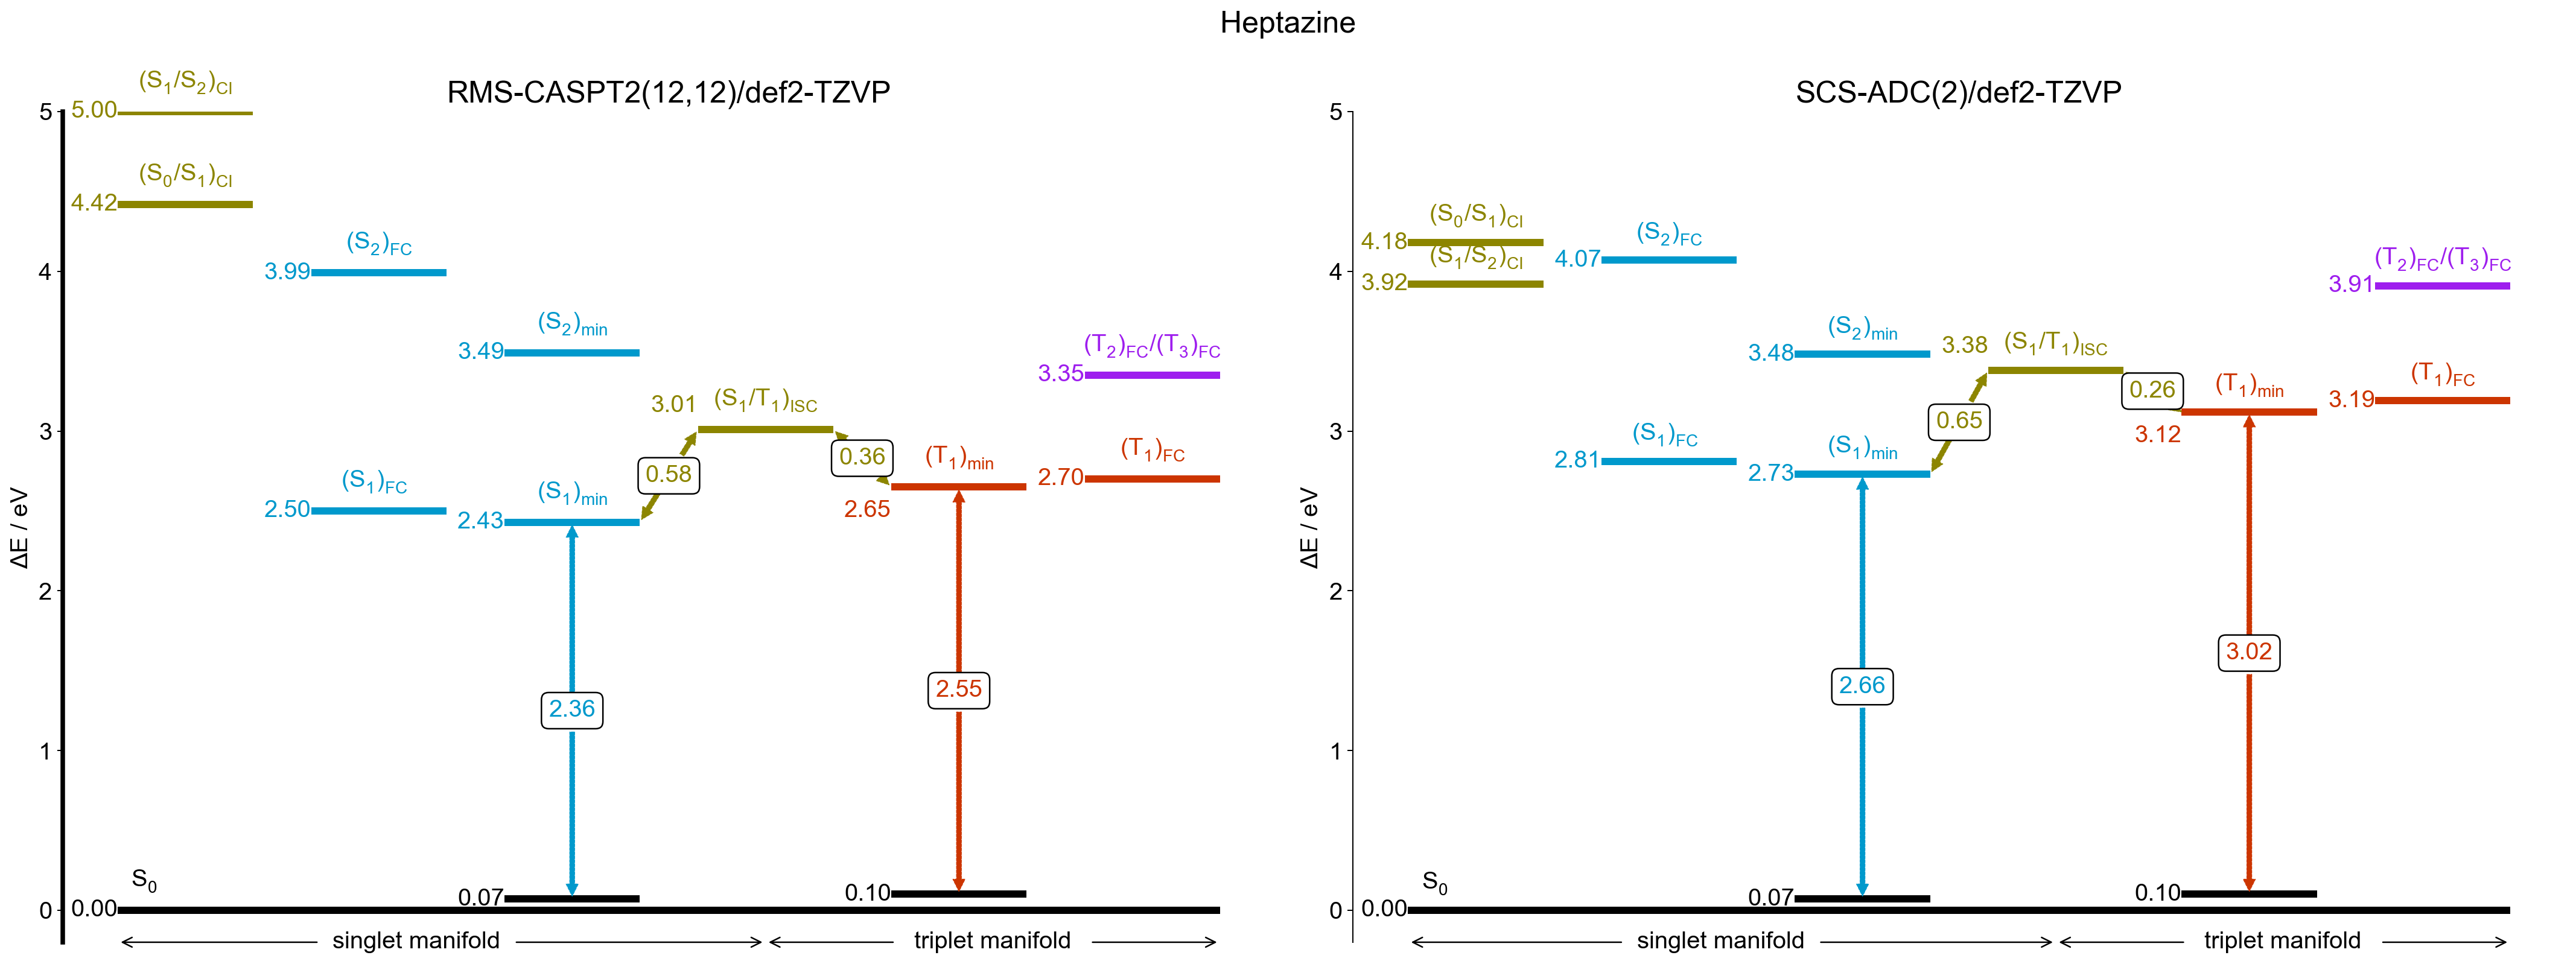

In [118]:
# Heptazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 2.50,
              "S2FC": 3.99,
              "T1FC": 2.70,
              "T2FC": 3.35,
              "T3FC": 3.35,
              "S1min": 2.43,
              "T1min": 2.65,
              "S2min": 3.49,
              "S1/T1-ISC": 3.01,
              "S0/S1-CI": 4.42,
              "S1/S2-CI": 5.00,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 2.81,
              "S2FC": 4.07,
              "T1FC": 3.19,
              "T2FC": 3.91,
              "T3FC": 3.91,
              "S1min": 2.73,
              "T1min": 3.12,
              "S2min": 3.48,
              "S1/T1-ISC": 3.38,
              "S0/S1-CI": 4.18,
              "S1/S2-CI": 3.92,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{rms_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{rms_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{rms_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')


scsadc2_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#scsadc2_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



scsadc2_diagram.add_link(2,5, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(5,9, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(9,10, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(10,14, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(14,17, ls='-', linewidth=4.8)

scsadc2_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
scsadc2_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 2, figsize=(24,9), dpi=180)
plt.setp(ax[0].spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Heptazine', size=20)
ax[0].set_title('RMS-CASPT2(12,12)/def2-TZVP')
ax[1].set_title('SCS-ADC(2)/def2-TZVP')
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[0], show_IDs=False)
scsadc2_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[1], show_IDs=False)
ax[0].set_ylim(-0.2, 5)
ax[0].set_aspect('auto')
ax[1].set_ylim(-0.2, 5)
ax[1].set_aspect('auto')
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax[0])
scsadc2_dict = get_ED_positions(scsadc2_diagram, ax[1])


fig.savefig('ws2-heptazine.png', facecolor='white', transparent=False, bbox_inches='tight')

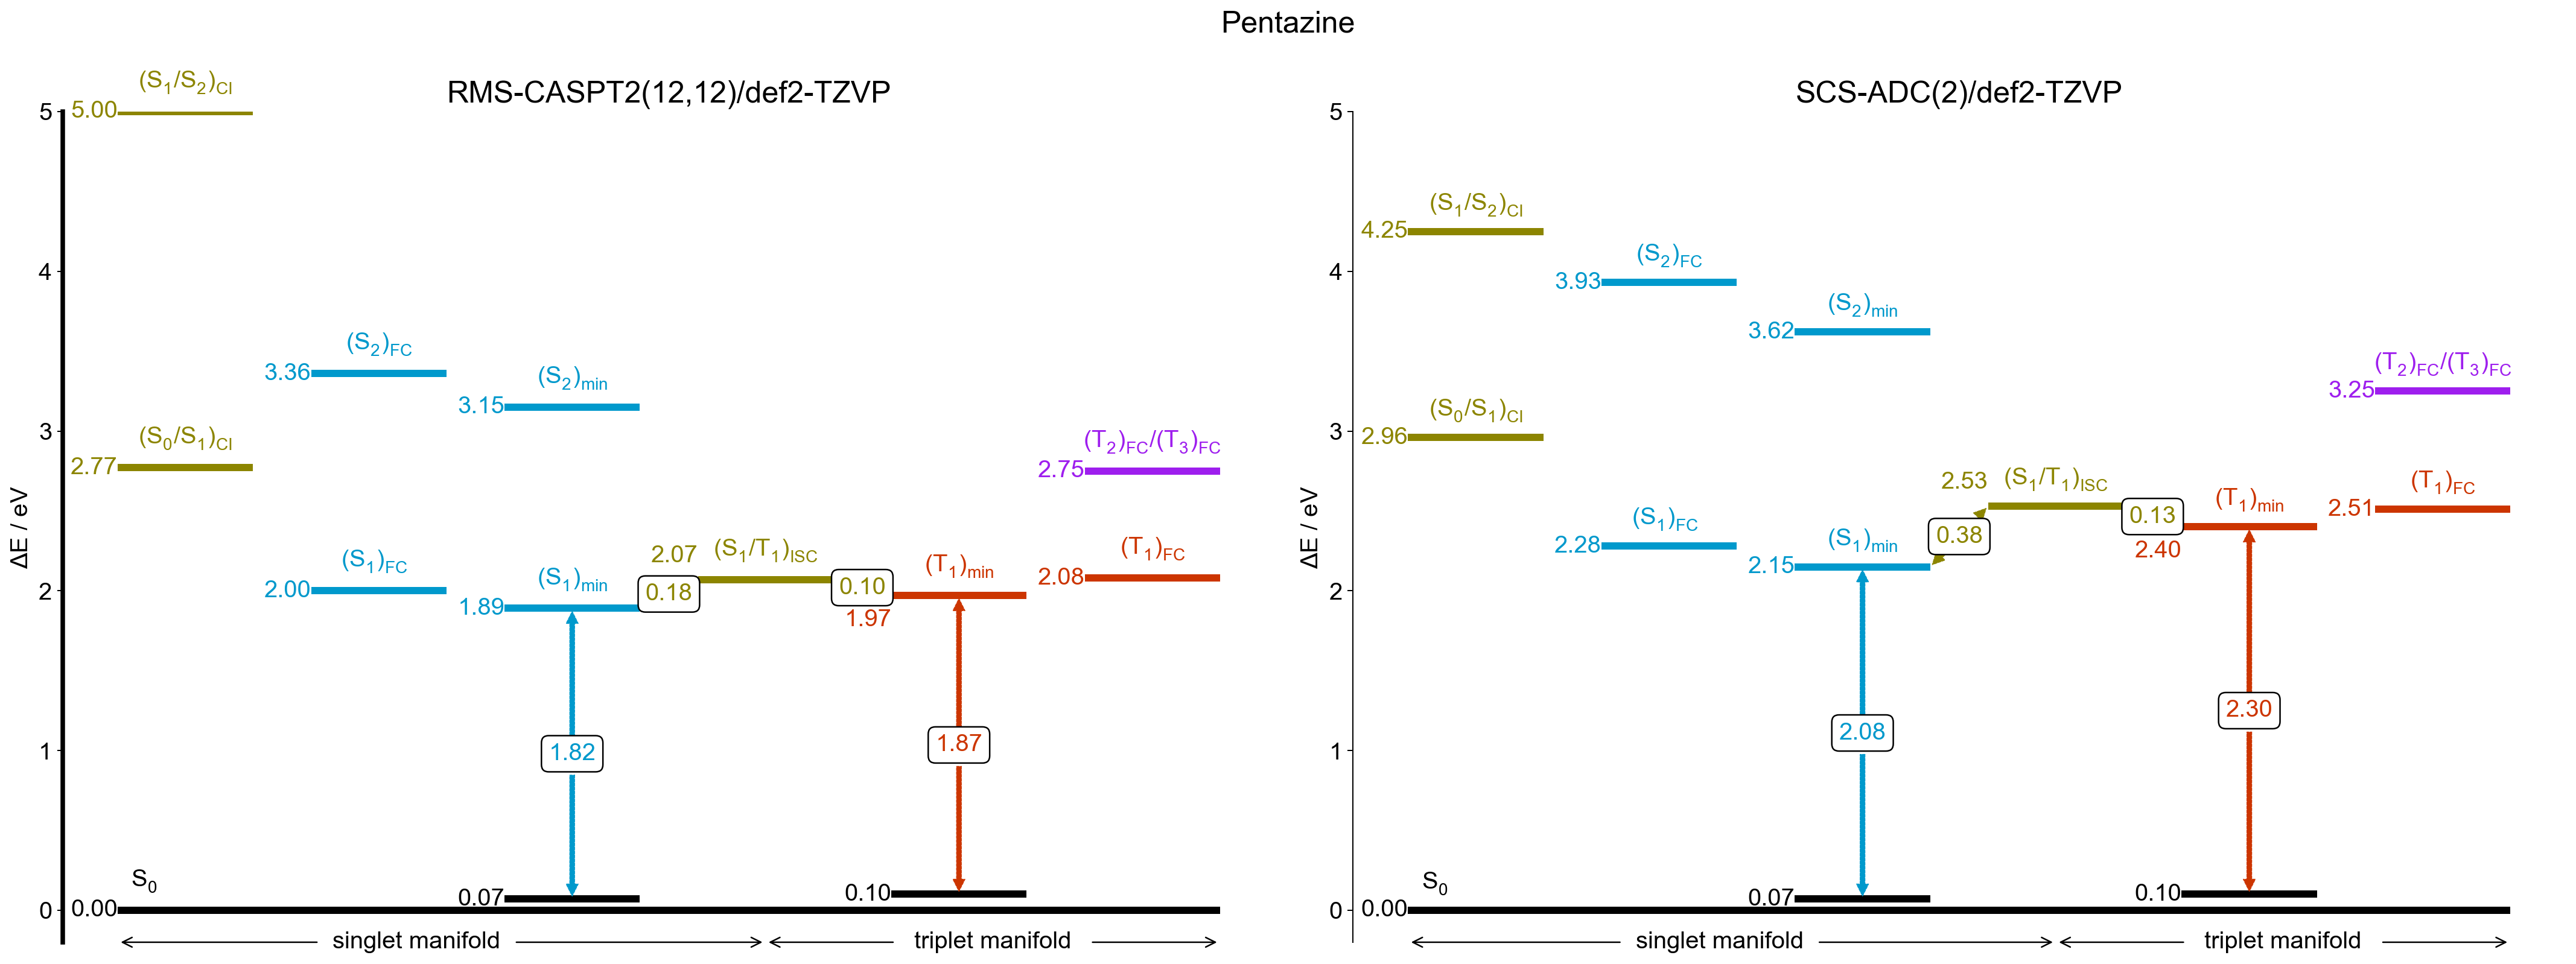

In [120]:
# Pentazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 2.00,
              "S2FC": 3.36,
              "T1FC": 2.08,
              "T2FC": 2.75,
              "T3FC": 2.92,
              "S1min": 1.89,
              "T1min": 1.97,
              "S2min": 3.15,
              "S1/T1-ISC": 2.07,
              "S0/S1-CI": 2.77,
              "S1/S2-CI": 5.00,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 2.28,
              "S2FC": 3.93,
              "T1FC": 2.51,
              "T2FC": 3.25,
              "T3FC": 3.40,
              "S1min": 2.15,
              "T1min": 2.40,
              "S2min": 3.62,
              "S1/T1-ISC": 2.53,
              "S0/S1-CI": 2.96,
              "S1/S2-CI": 4.25,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{rms_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{rms_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{rms_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(2,5, ls='-', linewidth=4.8)
rms_diagram.add_link(5,9, ls='-', linewidth=4.8)
rms_diagram.add_link(9,10, ls='-', linewidth=4.8)
rms_diagram.add_link(10,14, ls='-', linewidth=4.8)
rms_diagram.add_link(14,17, ls='-', linewidth=4.8)

rms_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')


scsadc2_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#scsadc2_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



scsadc2_diagram.add_link(2,5, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(5,9, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(9,10, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(10,14, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(14,17, ls='-', linewidth=4.8)

scsadc2_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
scsadc2_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 2, figsize=(24,9), dpi=180)
plt.setp(ax[0].spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Pentazine', size=20)
ax[0].set_title('RMS-CASPT2(12,12)/def2-TZVP')
ax[1].set_title('SCS-ADC(2)/def2-TZVP')
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[0], show_IDs=False)
scsadc2_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[1], show_IDs=False)
ax[0].set_ylim(-0.2, 5)
ax[0].set_aspect('auto')
ax[1].set_ylim(-0.2, 5)
ax[1].set_aspect('auto')
fig.tight_layout()

rms_dict = get_ED_positions(rms_diagram, ax[0])
scsadc2_dict = get_ED_positions(scsadc2_diagram, ax[1])

fig.savefig('ws2-pentazine.png', facecolor='white', transparent=False, bbox_inches='tight')

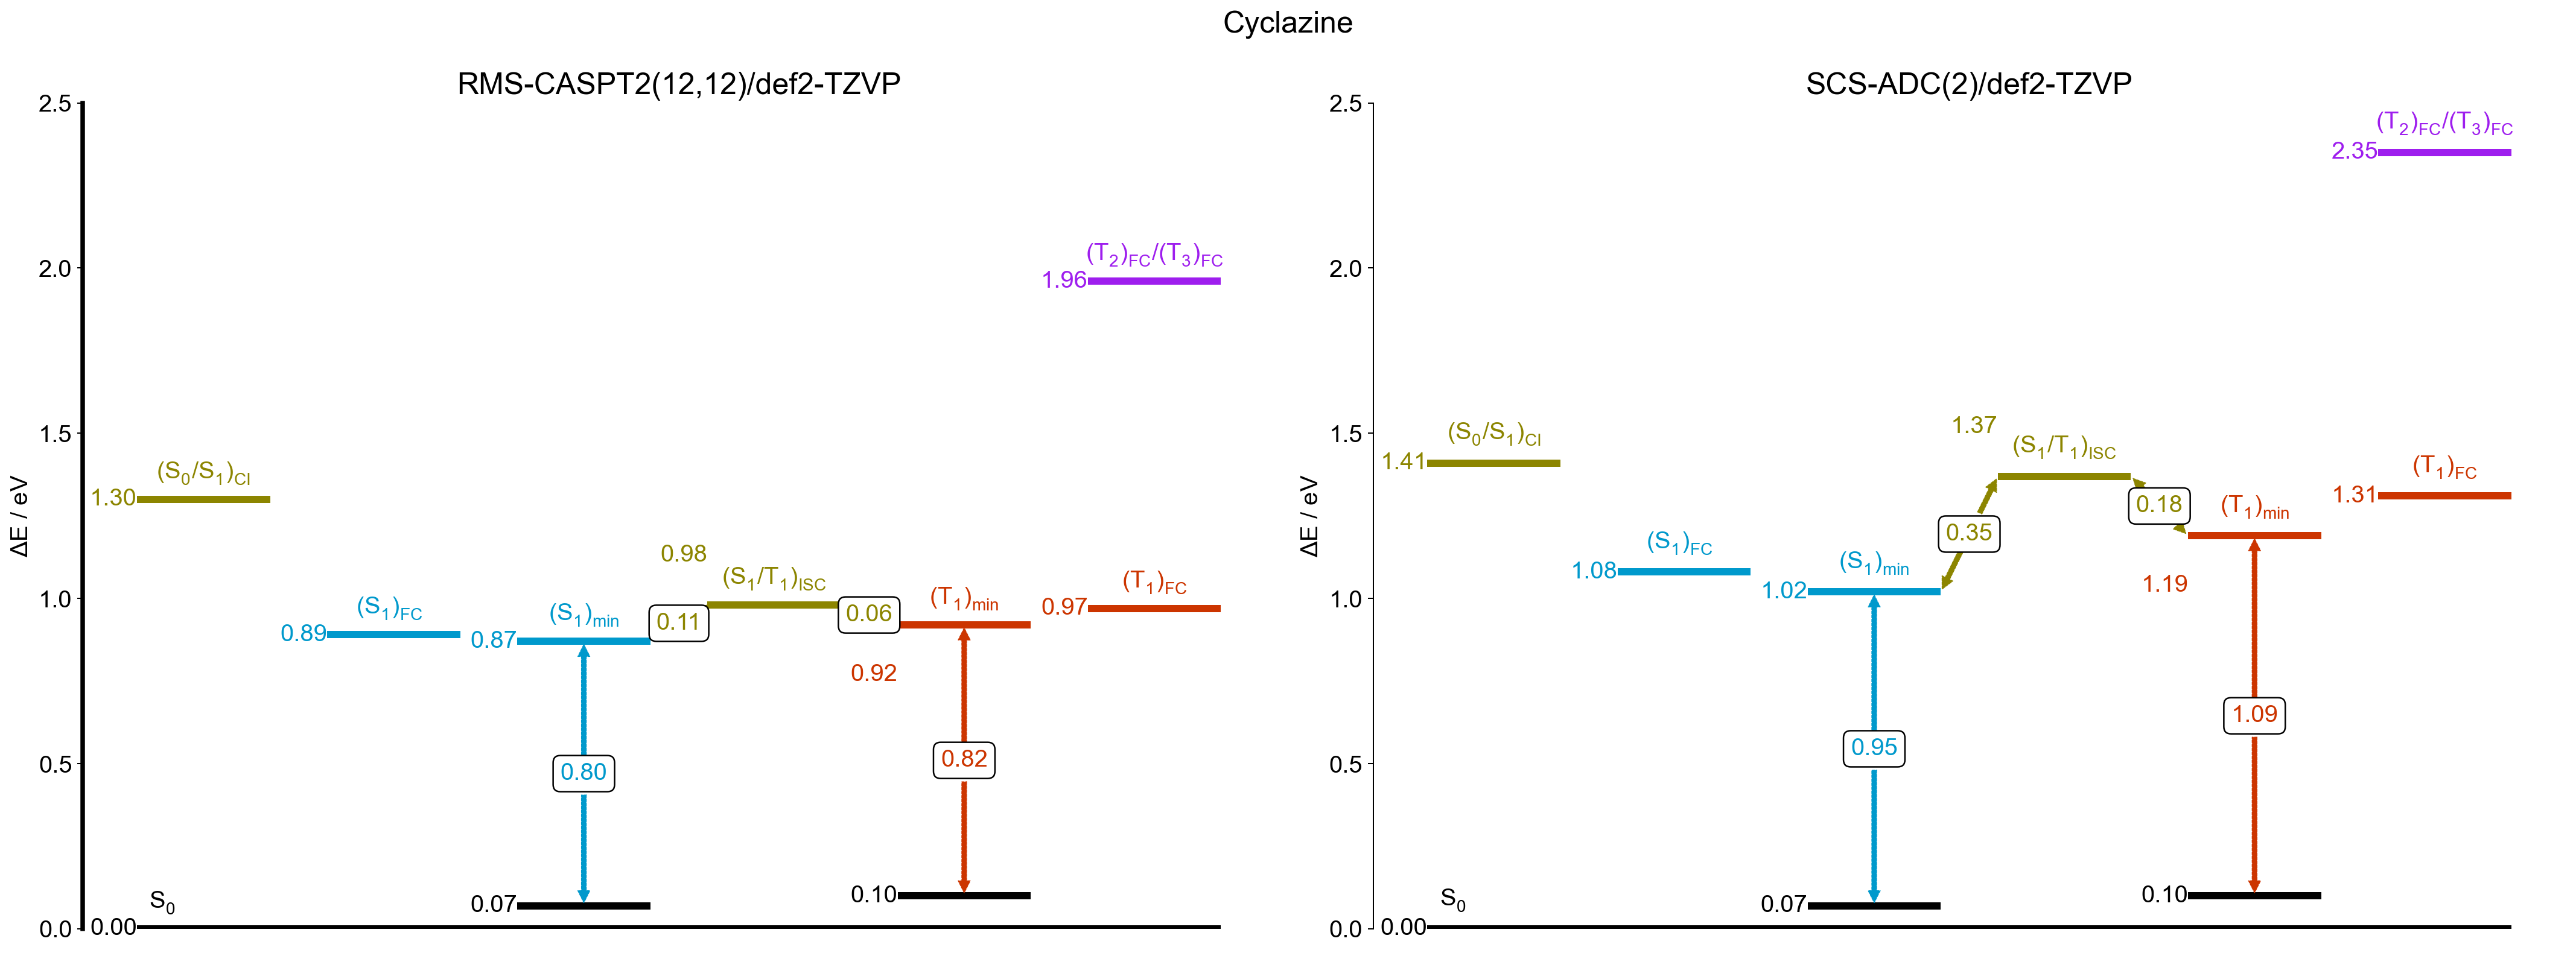

In [126]:
# Cyclazine
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
rms_energy_dict = {"S0": 0.00,
              "S1FC": 0.89,
              "S2FC": 2.76,
              "T1FC": 0.97,
              "T2FC": 1.96,
              "T3FC": 1.96,
              "S1min": 0.87,
              "T1min": 0.92,
              "S2min": 2.67,
              "S1/T1-ISC": 0.98,
              "S0/S1-CI": 1.30,
              "S1/S2-CI": 3.77,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

scsadc2_energy_dict = {"S0": 0.00,
              "S1FC": 1.08,
              "S2FC": 3.17,
              "T1FC": 1.31,
              "T2FC": 2.35,
              "T3FC": 2.35,
              "S1min": 1.02,
              "T1min": 1.19,
              "S2min": 2.94,
              "S1/T1-ISC": 1.37,
              "S0/S1-CI": 1.41,
              "S1/S2-CI": 4.65,
              "S1@S0": 0.07,
              "T1@S0": 0.10,
}

rms_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
rms_diagram.add_level(rms_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{rms_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{rms_energy_dict['S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{rms_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{rms_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{rms_energy_dict['S1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S0'], top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{rms_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['T1@S0'], top_text='', left_text=f"{rms_energy_dict['T1@S0']:.2f}", color='black')
rms_diagram.add_level(rms_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{rms_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
rms_diagram.add_level(rms_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{rms_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
rms_diagram.add_level(rms_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{rms_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#rms_diagram.add_level(rms_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{rms_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
rms_diagram.add_level(rms_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



rms_diagram.add_link(1,3, ls='-', linewidth=4.8)
rms_diagram.add_link(3,6, ls='-', linewidth=4.8)
rms_diagram.add_link(6,7, ls='-', linewidth=4.8)
rms_diagram.add_link(7,11, ls='-', linewidth=4.8)
rms_diagram.add_link(11,14, ls='-', linewidth=4.8)

rms_diagram.add_arrow(4,5, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
rms_diagram.add_linked_arrow(4,8, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_linked_arrow(8,10, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
rms_diagram.add_arrow(10,9, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')


scsadc2_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#scsadc2_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



scsadc2_diagram.add_link(1,3, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(3,6, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(6,7, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(7,11, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(11,14, ls='-', linewidth=4.8)

scsadc2_diagram.add_arrow(4,5, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
scsadc2_diagram.add_linked_arrow(4,8, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_linked_arrow(8,10, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_arrow(10,9, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

fig, ax = plt.subplots(1, 2, figsize=(24,9), dpi=180)
plt.setp(ax[0].spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
plt.suptitle('Cyclazine', size=20)
ax[0].set_title('RMS-CASPT2(12,12)/def2-TZVP')
ax[1].set_title('SCS-ADC(2)/def2-TZVP')
#rms_diagram.dimension = 3
#scsadc2_diagram.dimension = 3
rms_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[0], show_IDs=False)
scsadc2_diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax[1], show_IDs=False)
ax[0].set_ylim(0, 2.5)
ax[0].set_aspect('auto')
ax[1].set_ylim(0, 2.5)
ax[1].set_aspect('auto')
fig.tight_layout()



fig.savefig('ns2-cyclazine.png', facecolor='white', transparent=False, bbox_inches='tight')

In [ ]:
scsadc2_diagram = ED(hline_linewidth=4.8, color_bottom_text='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0/S1-CI'], top_text=r'$(S_0/S_1)_{CI}$', left_text=f"{scsadc2_energy_dict['S0/S1-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/S2-CI'], position='l', top_text=r'$(S_1/S_2)_{CI}$', left_text=f"{scsadc2_energy_dict['S1/S2-CI']:.2f}", color=color['y'])
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text=r'$S_0$             ', left_text=f"{scsadc2_energy_dict['S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1FC'], top_text=r'$(S_1)_{FC}$  ', left_text=f"{scsadc2_energy_dict['S1FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2FC'], position='l', top_text=r'$(S_2)_{FC}$', left_text=f"{scsadc2_energy_dict['S2FC']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1min'], top_text=r'$(S_1)_{min}$', left_text=f"{scsadc2_energy_dict['S1min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S2min'], position='l', top_text=r'$(S_2)_{min}$', left_text=f"{scsadc2_energy_dict['S2min']:.2f}", color=color['b'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['S1@S0'], position='l', top_text='', left_text=f"{scsadc2_energy_dict['S1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['S1/T1-ISC'], position='l', top_text=r'$(S_1/T_1)_{ISC}$', left_text=f"{scsadc2_energy_dict['S1/T1-ISC']:.2f}", color=color['y'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['T1@S0'], top_text='', left_text=f"{scsadc2_energy_dict['T1@S0']:.2f}", color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1min'], position='l', top_text=r'$(T_1)_{min}$', left_text=f"{scsadc2_energy_dict['T1min']:.2f}", color=color['r'], left_offset=-0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')
scsadc2_diagram.add_level(scsadc2_energy_dict['T1FC'], top_text=r'$(T_1)_{FC}$', left_text=f"{scsadc2_energy_dict['T1FC']:.2f}", color=color['r'], left_offset=0)
scsadc2_diagram.add_level(scsadc2_energy_dict['T2FC'], position='l', top_text=r'$(T_2)_{FC} / (T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T2FC']:.2f}", color=color['p'], left_offset=0)
#scsadc2_diagram.add_level(scsadc2_energy_dict['T3FC'], position='l', top_text=r'$(T_3)_{FC}$', left_text=f"{scsadc2_energy_dict['T3FC']:.2f}", color=color['o'], left_offset=0.15)
scsadc2_diagram.add_level(scsadc2_energy_dict['S0'], position='l', top_text='', left_text='', color='black')



scsadc2_diagram.add_link(2,5, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(5,9, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(9,10, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(10,14, ls='-', linewidth=4.8)
scsadc2_diagram.add_link(14,17, ls='-', linewidth=4.8)

scsadc2_diagram.add_arrow(6,8, arrow_color=color['b'], width=0.5, text_color=color['b'], linestyle='--')
scsadc2_diagram.add_linked_arrow(6,11, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_linked_arrow(11,13, arrow_color=color['y'], width=0.5, text_color=color['y'], linestyle='--')
scsadc2_diagram.add_arrow(13,12, arrow_color=color['r'], width=0.5, text_color=color['r'], linestyle='--')

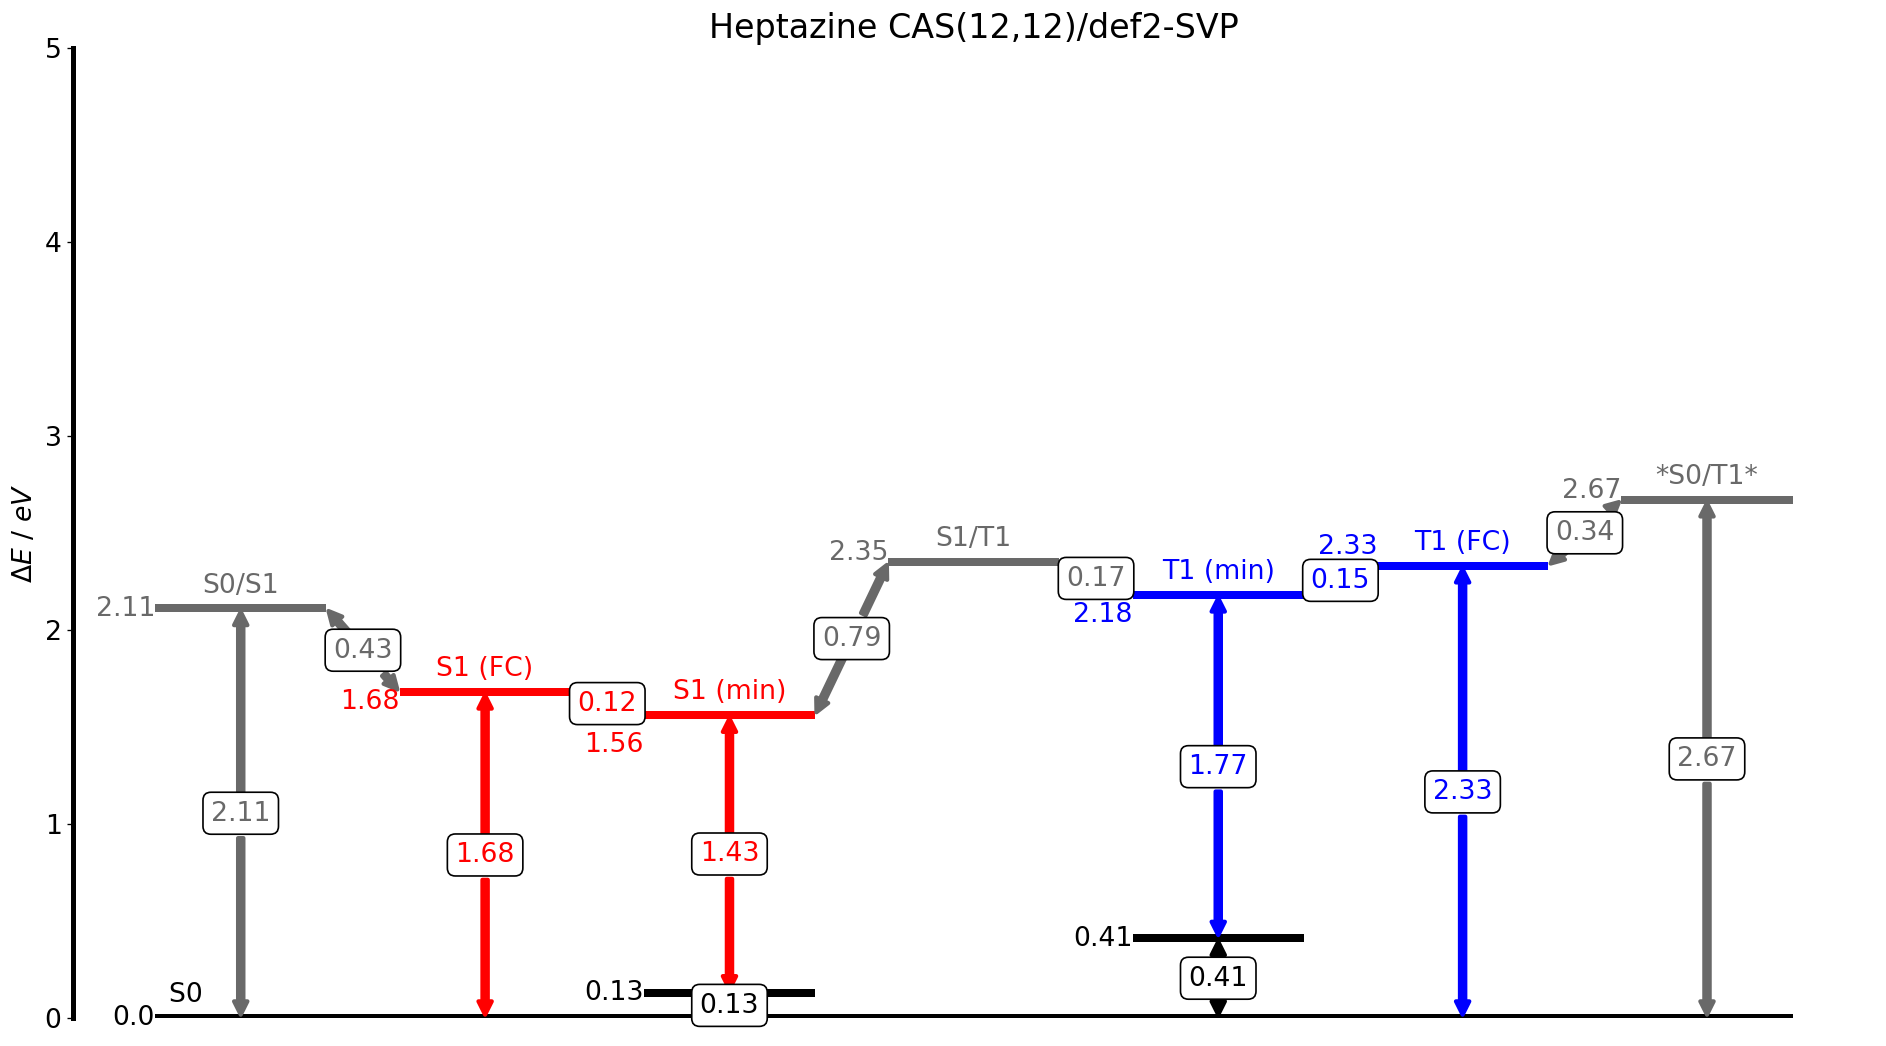

In [31]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [2.11, 1.68, 1.56, 0.13, 0.00, 2.35, 0.41, 2.18, 2.33, 2.67]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='{}'.format(energies[9]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='dimgray')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine CAS(12,12)/def2-SVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_aspect('auto')
ax.set_ylim(0, 5)
fig.tight_layout()
fig.savefig('hz-cas-svp.png', facecolor='white', transparent=False, bbox_inches='tight')

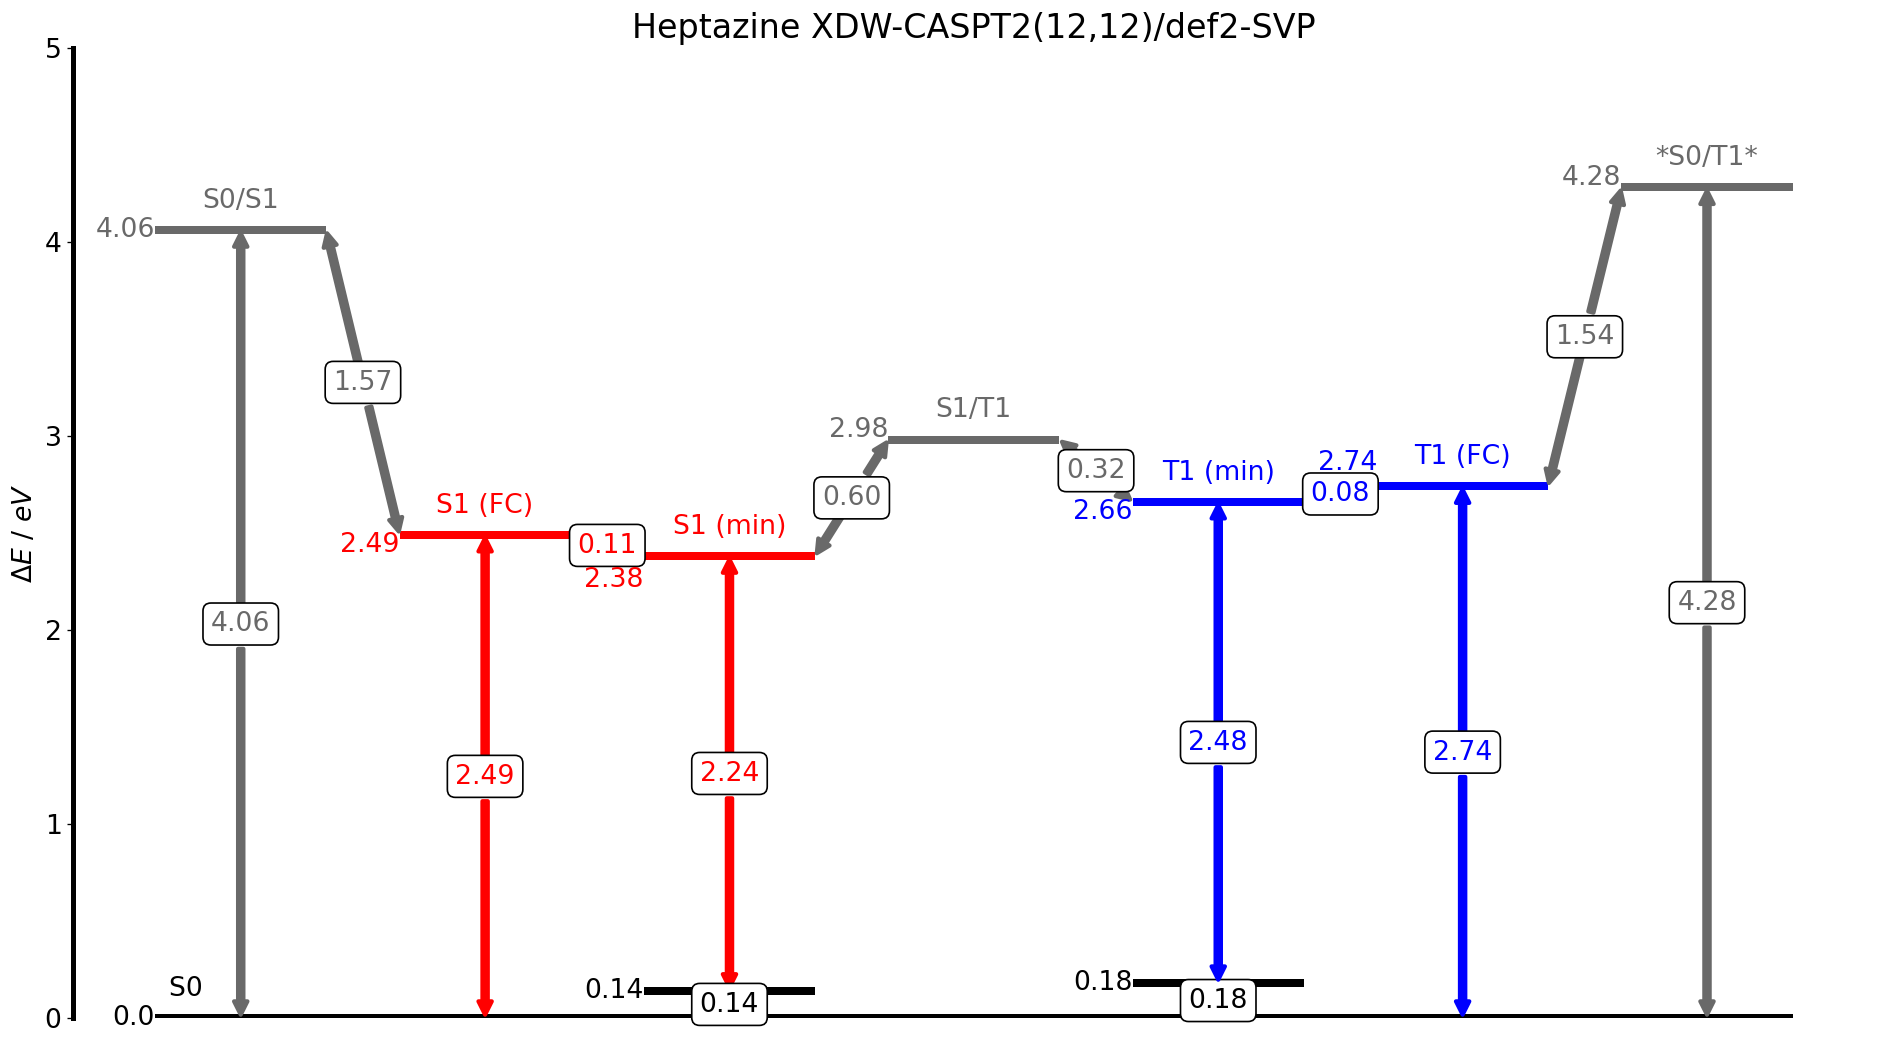

In [32]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [4.06, 2.49, 2.38, 0.14, 0.00, 2.98, 0.18, 2.66, 2.74, 4.28]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.12)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.12)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='{}'.format(energies[9]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='dimgray')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine XDW-CASPT2(12,12)/def2-SVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 5)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('hz-xdw-svp.png', facecolor='white', transparent=False, bbox_inches='tight')

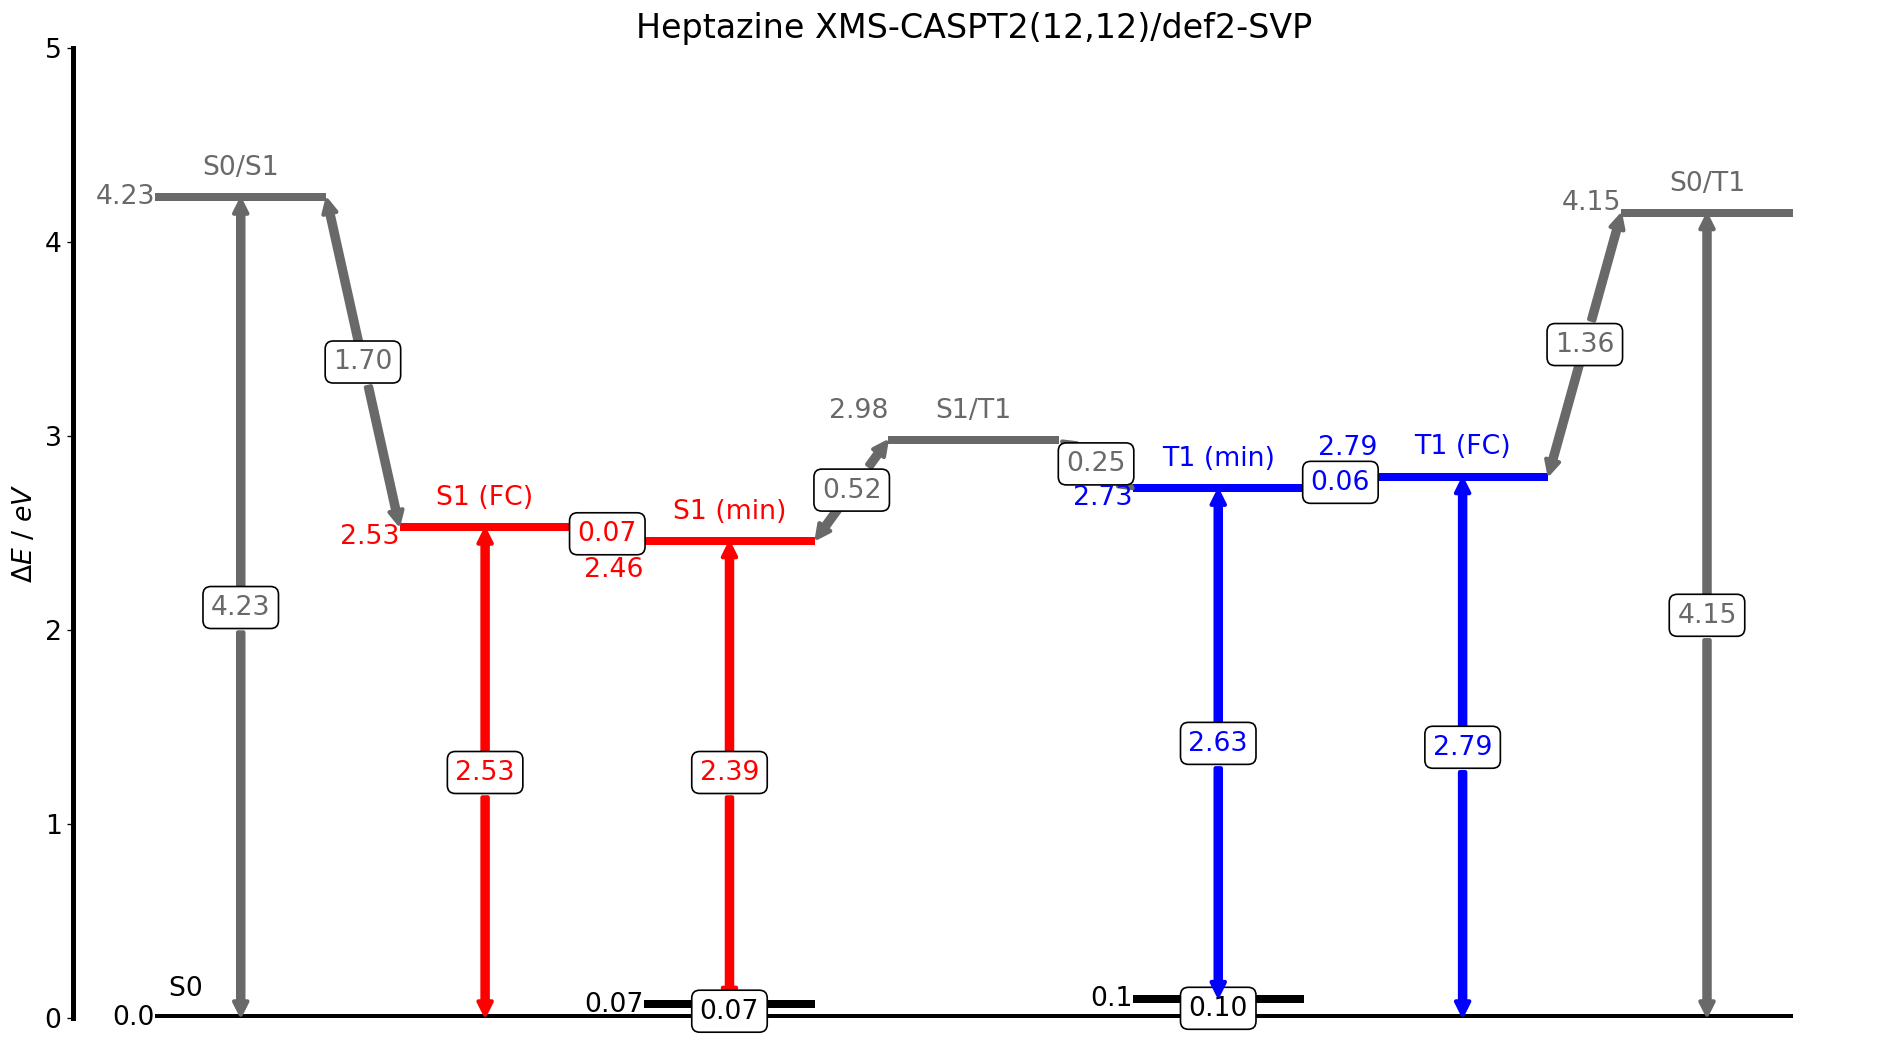

In [33]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [4.23, 2.53, 2.46, 0.07, 0.00, 2.98, 0.10, 2.73, 2.79, 4.15]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='S0/T1', left_text='{}'.format(energies[9]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='dimgray')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine XMS-CASPT2(12,12)/def2-SVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 5)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('hz-xms-svp.png', facecolor='white', transparent=False, bbox_inches='tight')

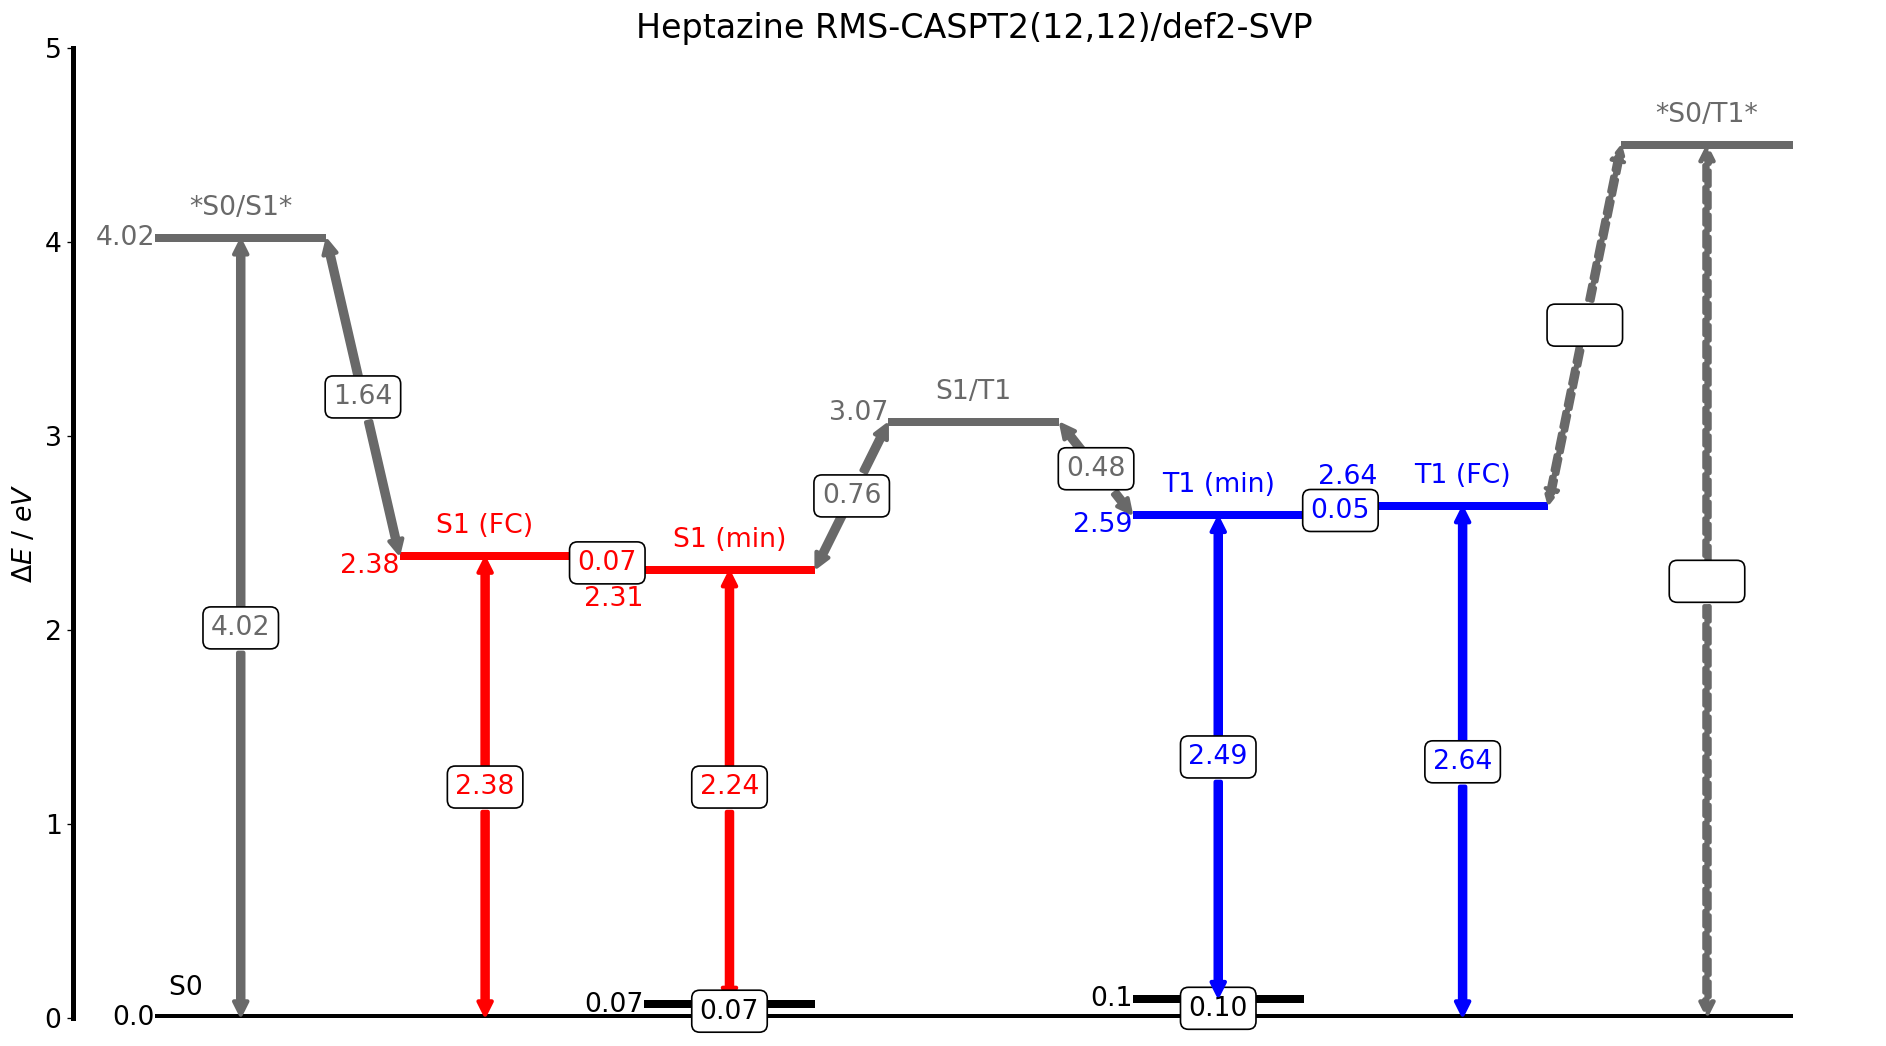

In [34]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [4.02, 2.38, 2.31, 0.07, 0.00, 3.07, 0.10, 2.59, 2.64, 4.5]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='*S0/S1*', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine RMS-CASPT2(12,12)/def2-SVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 5)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('hz-rms-svp.png', facecolor='white', transparent=False, bbox_inches='tight')

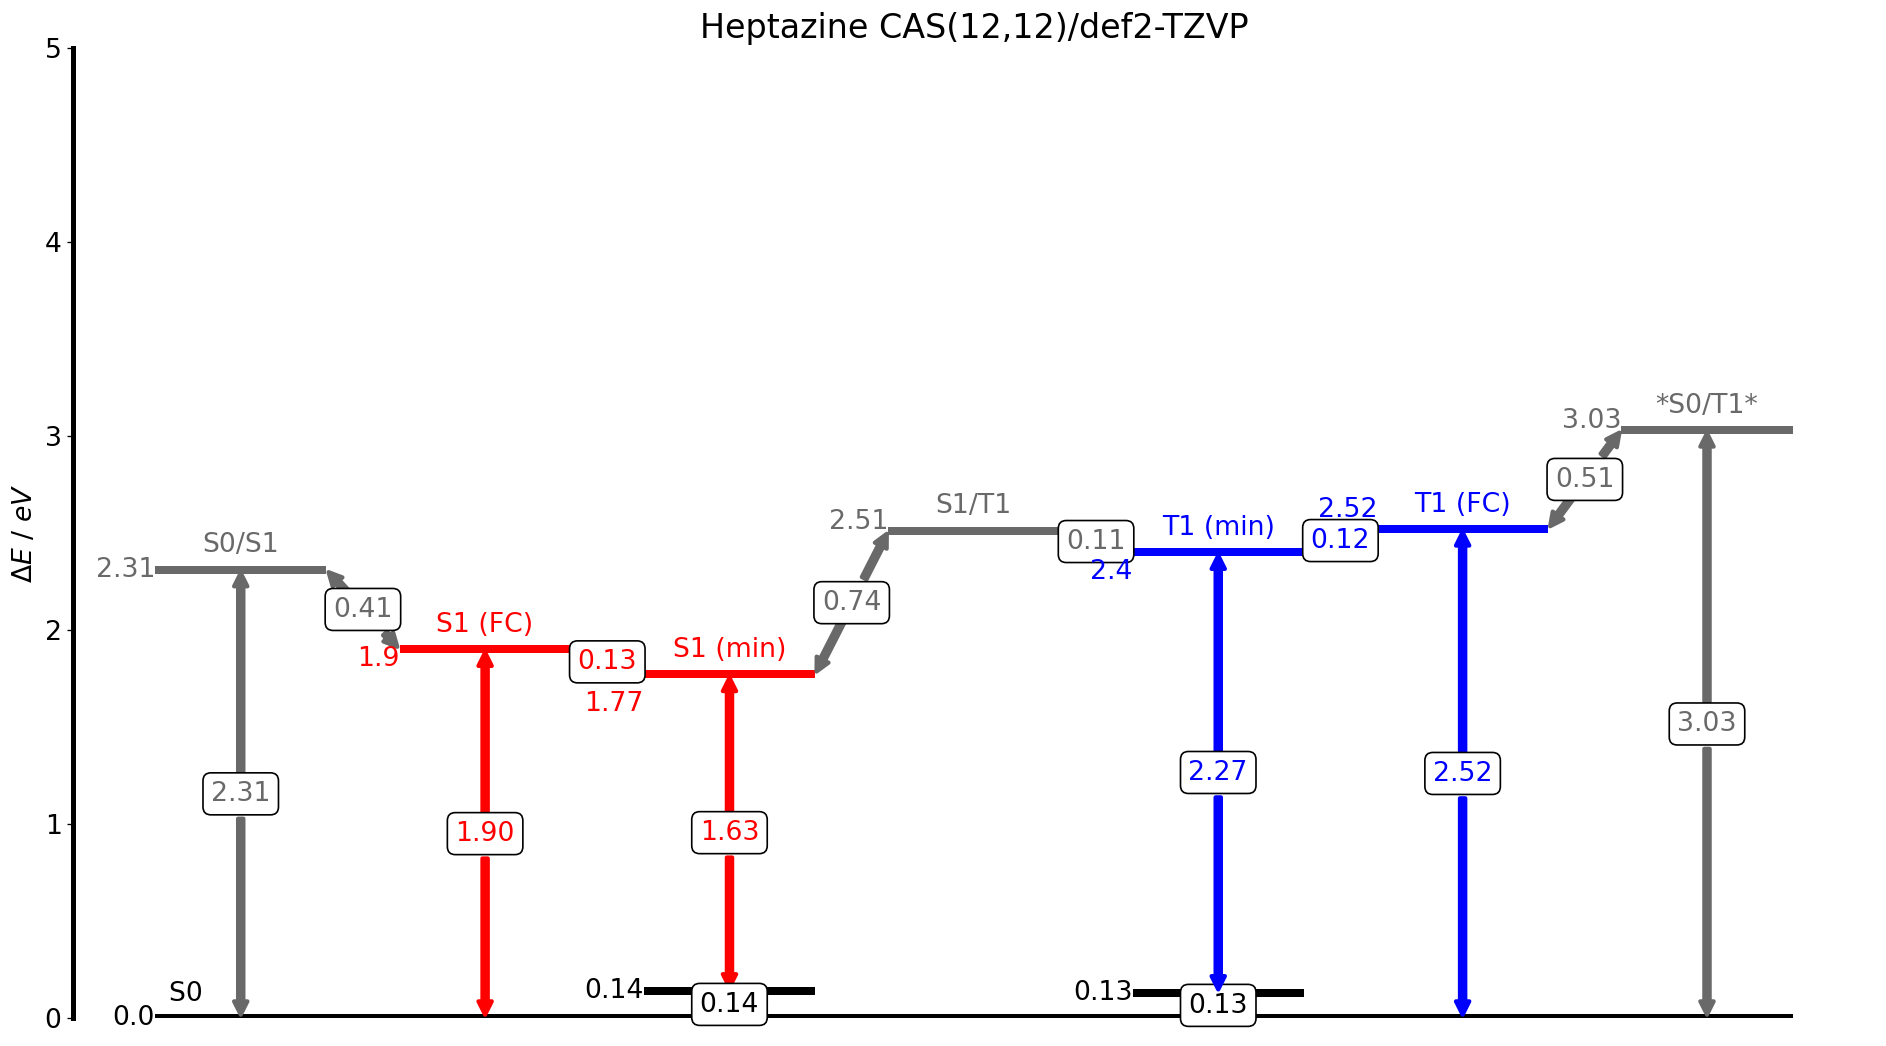

In [35]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [2.31, 1.90, 1.77, 0.14, 0.00, 2.51, 0.13, 2.40, 2.52, 3.03]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='{}'.format(energies[9]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='dimgray')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine CAS(12,12)/def2-TZVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_aspect('auto')
ax.set_ylim(0, 5)
fig.tight_layout()
fig.savefig('hz-cas-tzvp.png', facecolor='white', transparent=False, bbox_inches='tight')

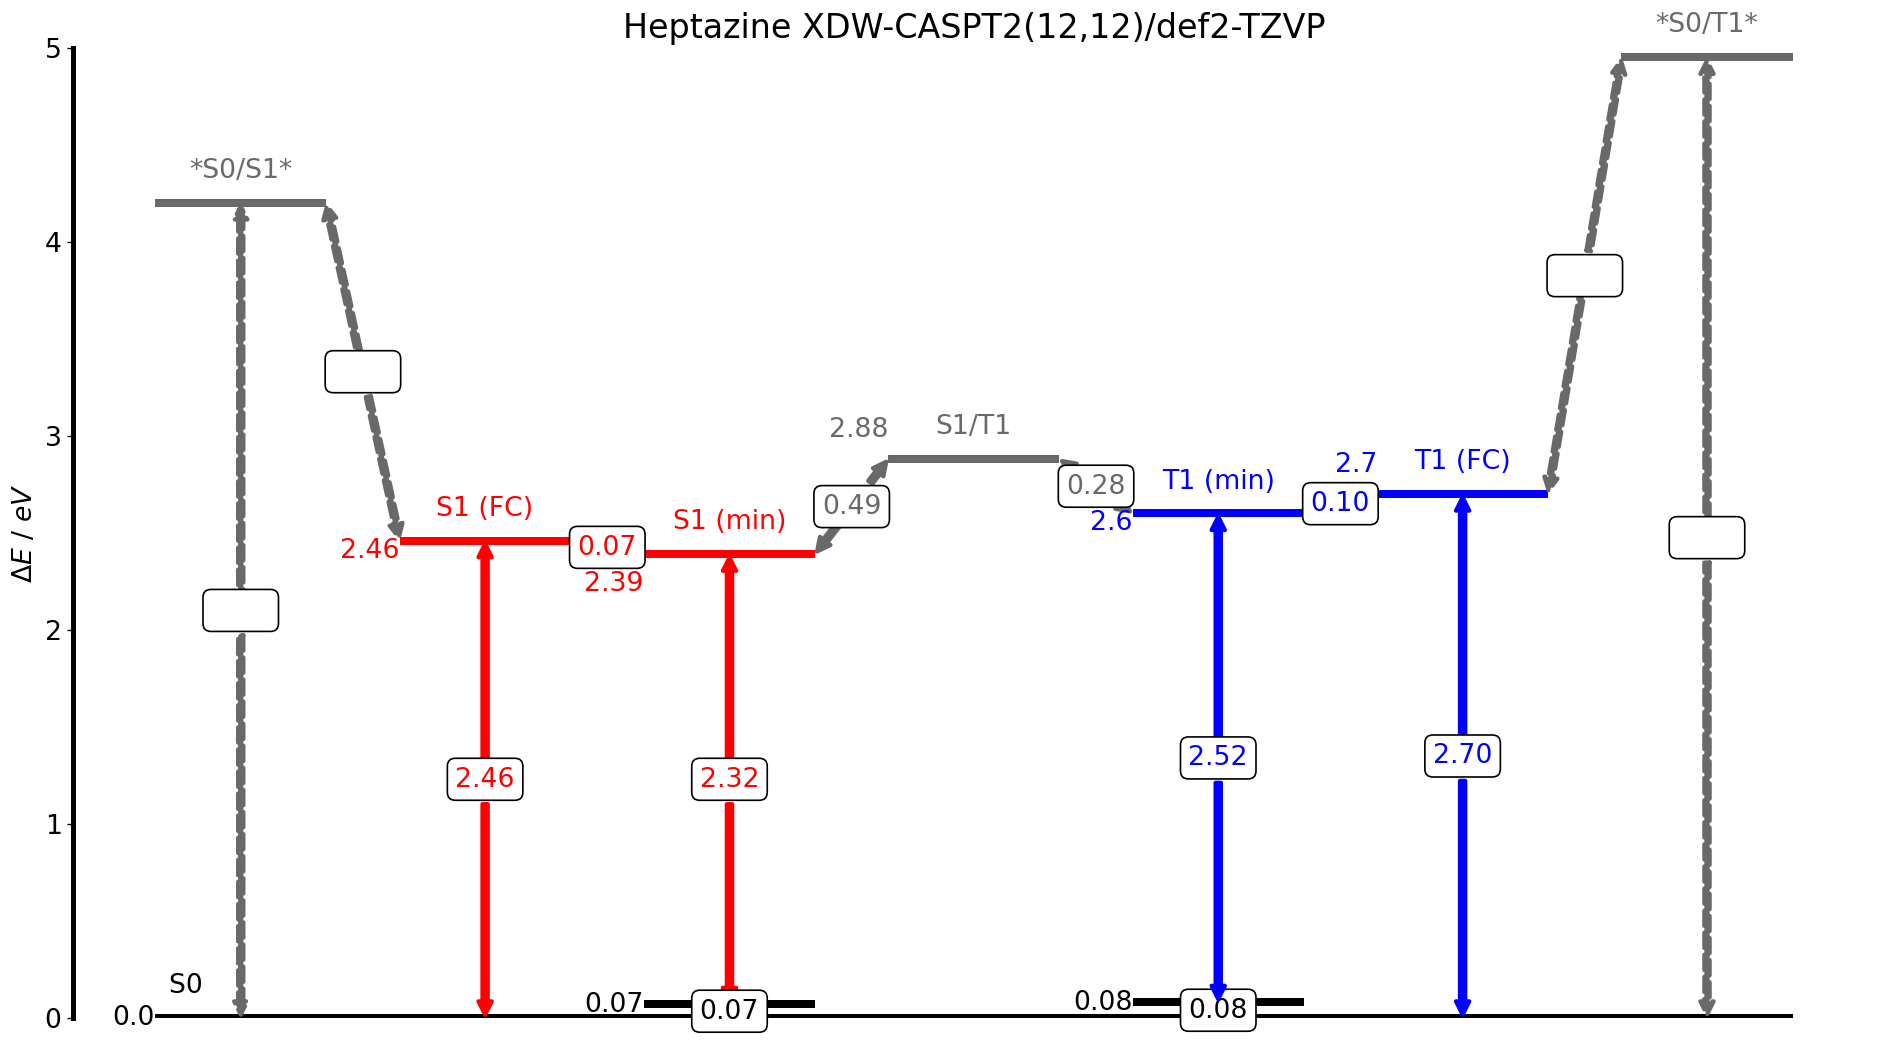

In [51]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [4.20, 2.46, 2.39, 0.07, 0.00, 2.88, 0.08, 2.60, 2.70, 4.95]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='*S0/S1*', left_text='', color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine XDW-CASPT2(12,12)/def2-TZVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 5)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('hz-xdw-tzvp.png', facecolor='white', transparent=False, bbox_inches='tight')

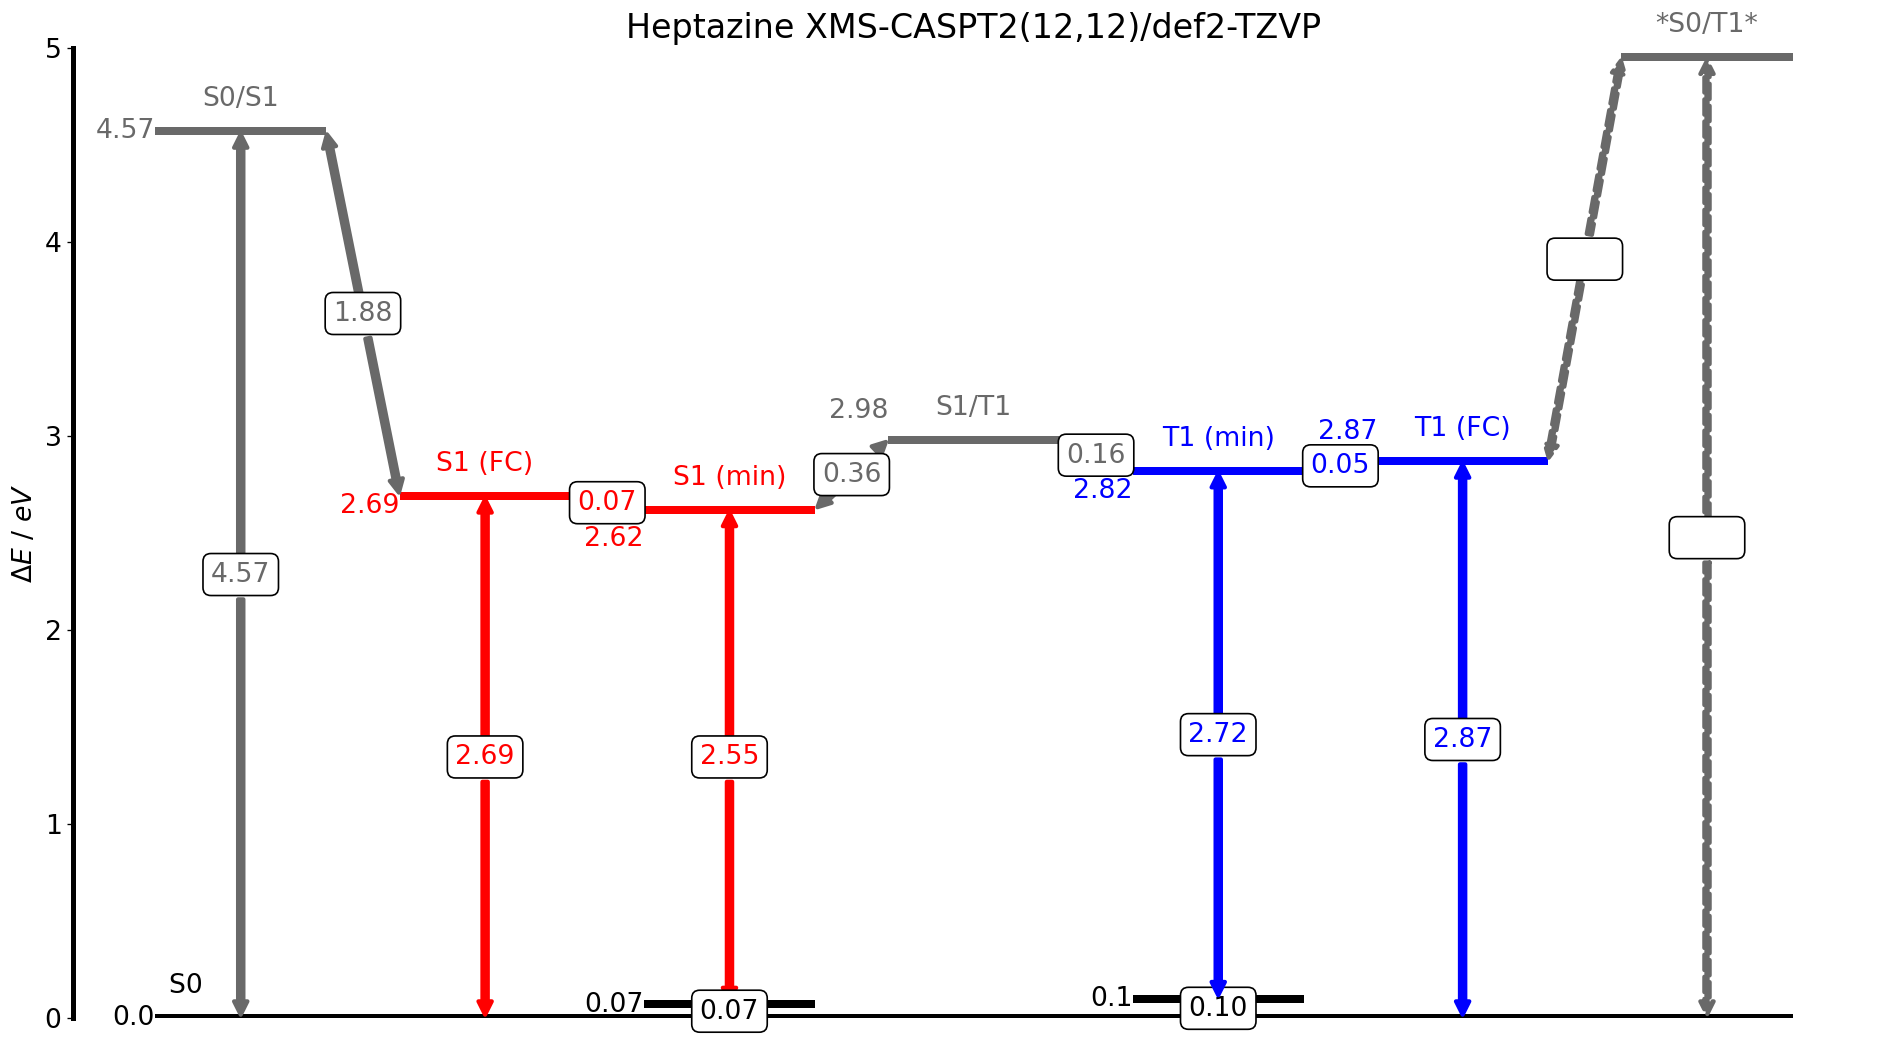

In [56]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [4.57, 2.69, 2.62, 0.07, 0.00, 2.98, 0.10, 2.82, 2.87, 4.95]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine XMS-CASPT2(12,12)/def2-TZVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 5)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('hz-xms-tzvp.png', facecolor='white', transparent=False, bbox_inches='tight')

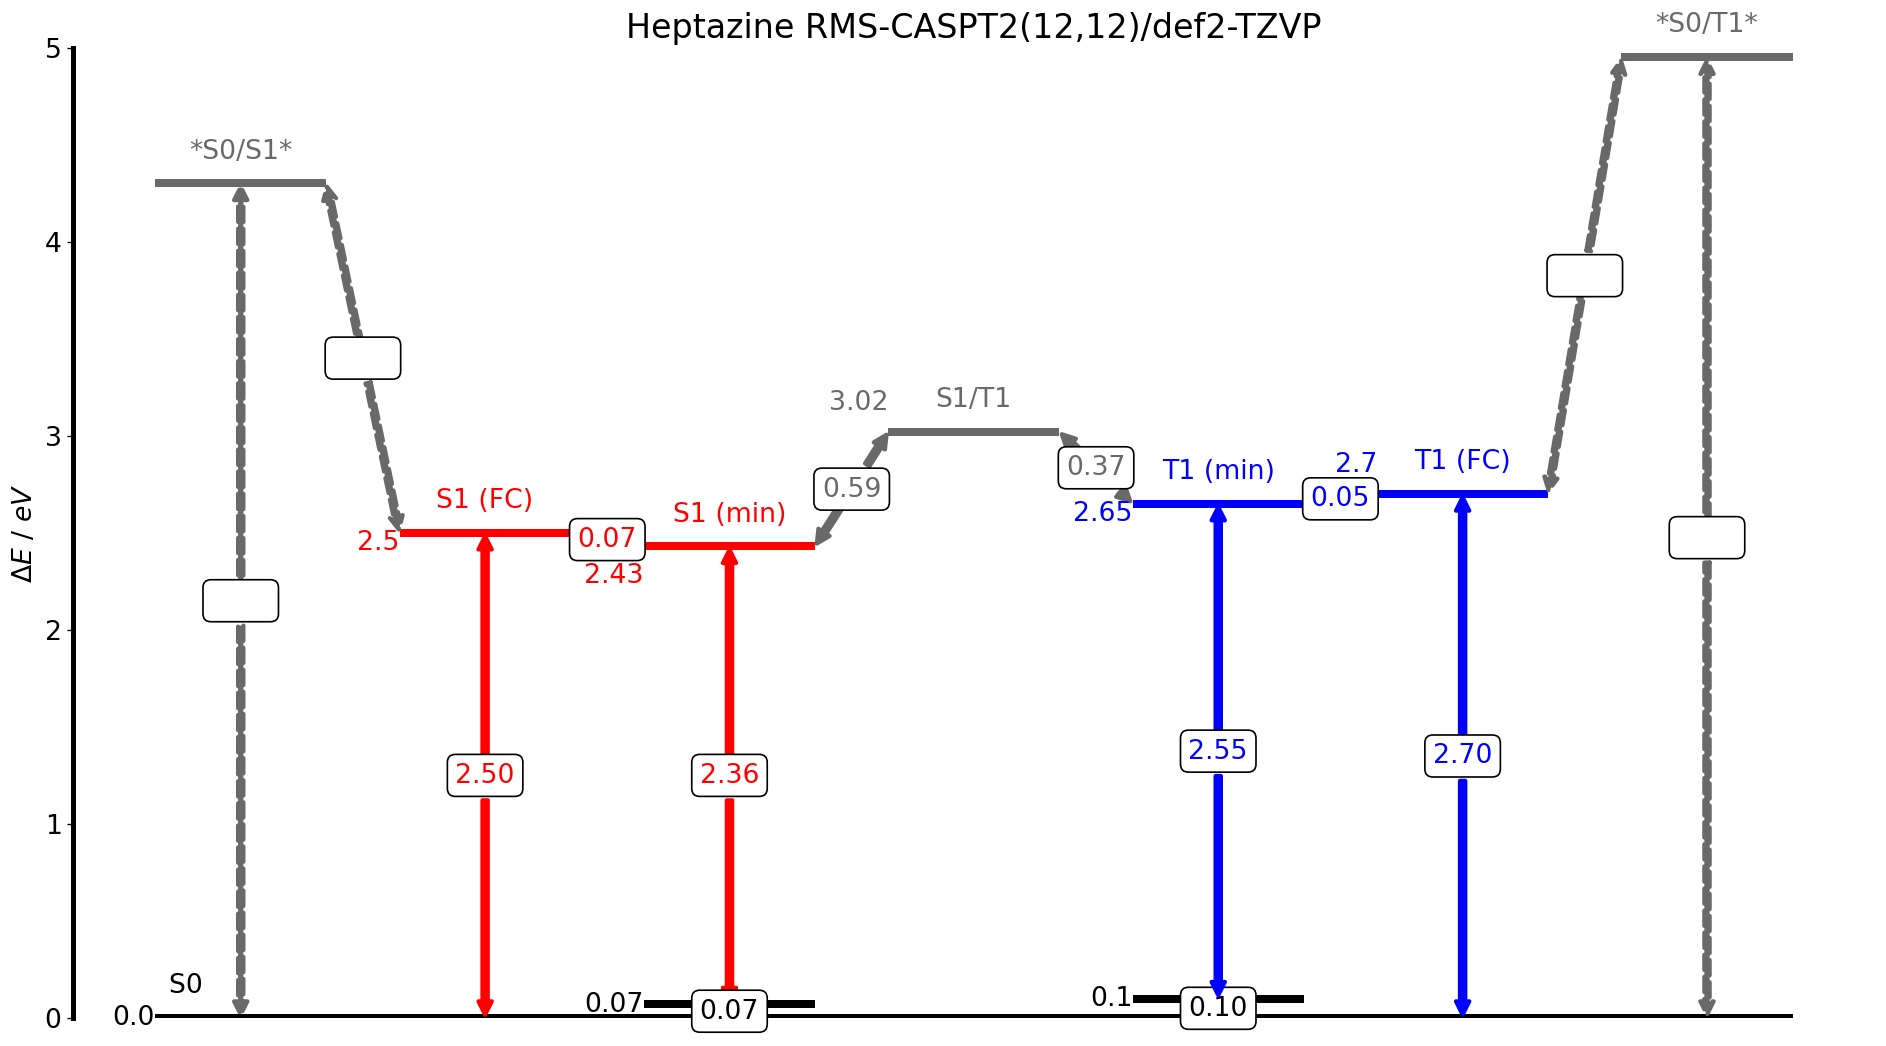

In [49]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [4.30, 2.50, 2.43, 0.07, 0.00, 3.02, 0.10, 2.65, 2.70, 4.95]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='*S0/S1*', left_text='', color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Heptazine RMS-CASPT2(12,12)/def2-TZVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 5)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('hz-rms-tzvp.png', facecolor='white', transparent=False, bbox_inches='tight')

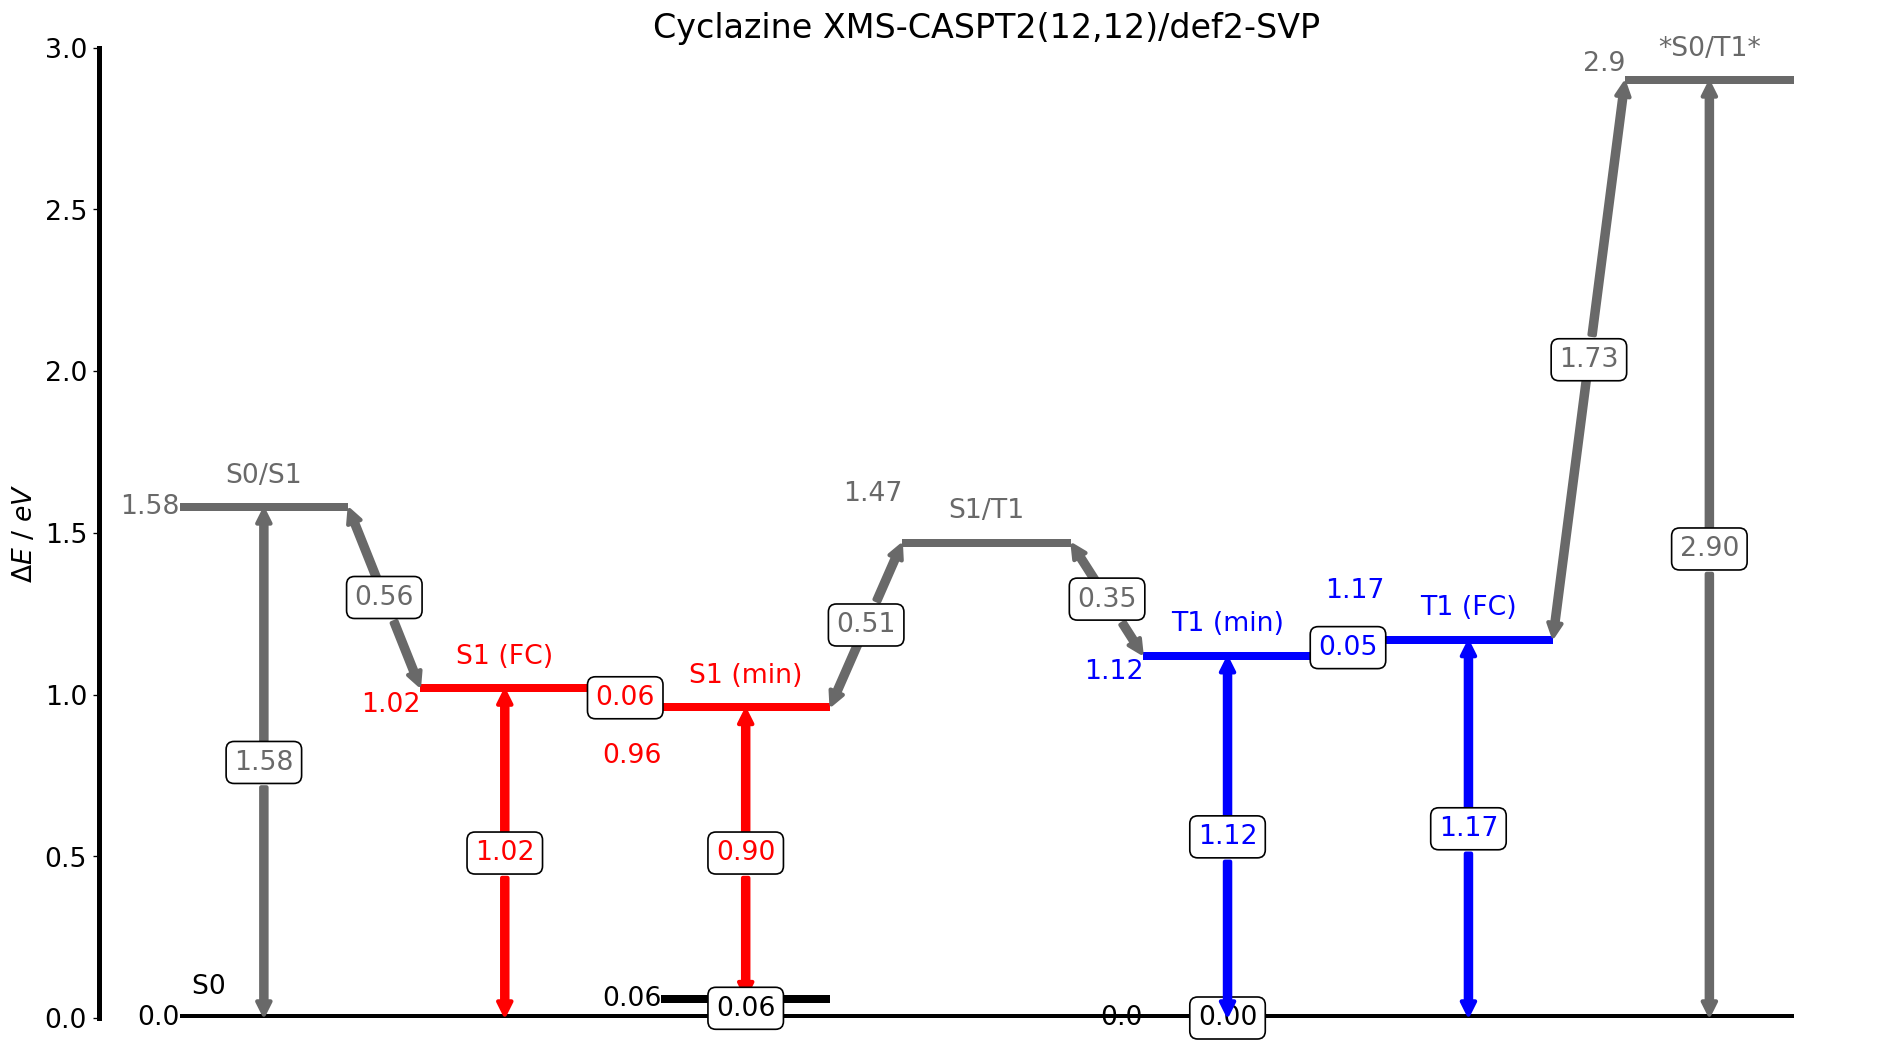

In [3]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [1.58, 1.02, 0.96, 0.06, 0.00, 1.47, 0.00, 1.12, 1.17, 2.90]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='{}'.format(energies[9]), color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray', linestyle='-')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray', linestyle='-')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='dimgray')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Cyclazine XMS-CASPT2(12,12)/def2-SVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 3)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('mz-xms-svp.png', facecolor='white', transparent=False, bbox_inches='tight')

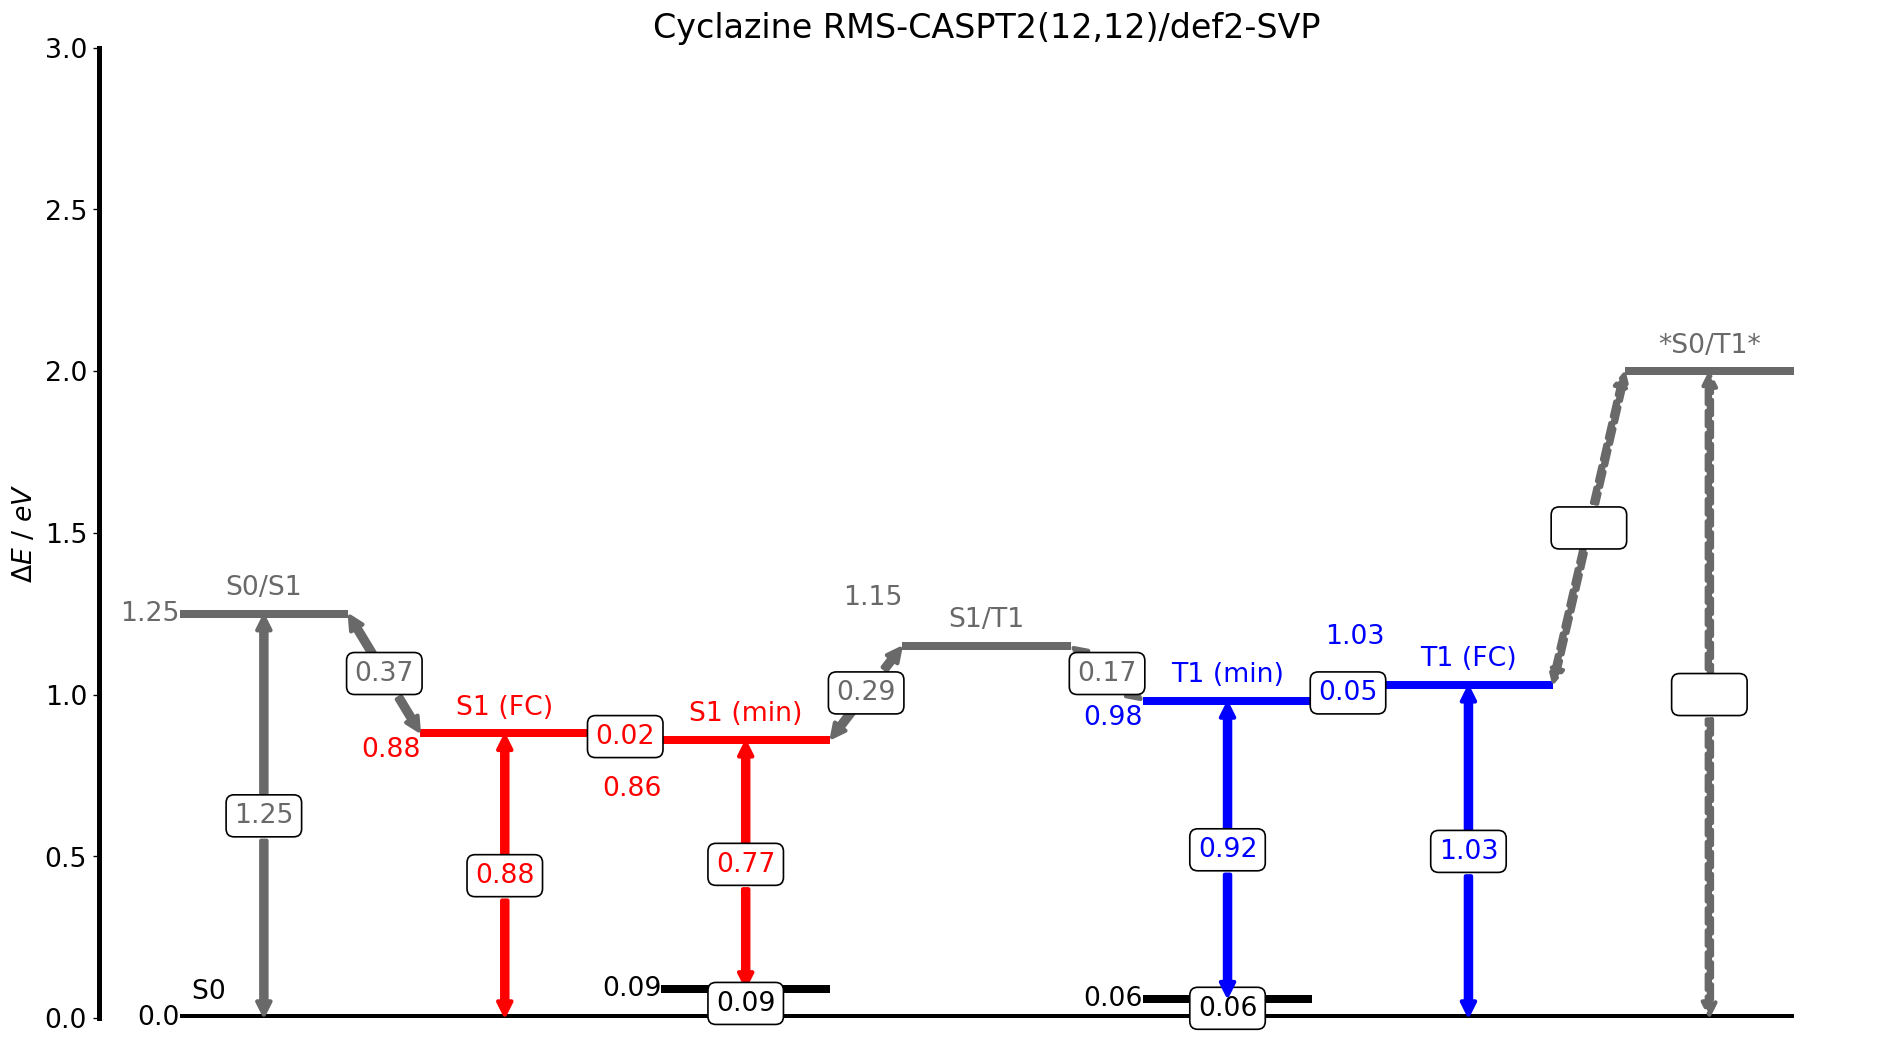

In [7]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [1.25, 0.88, 0.86, 0.09, 0.00, 1.15, 0.06, 0.98, 1.03, 2.00]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.15)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray', linestyle='-')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray', linestyle='-')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Cyclazine RMS-CASPT2(12,12)/def2-SVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 3)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('mz-rms-svp.png', facecolor='white', transparent=False, bbox_inches='tight')

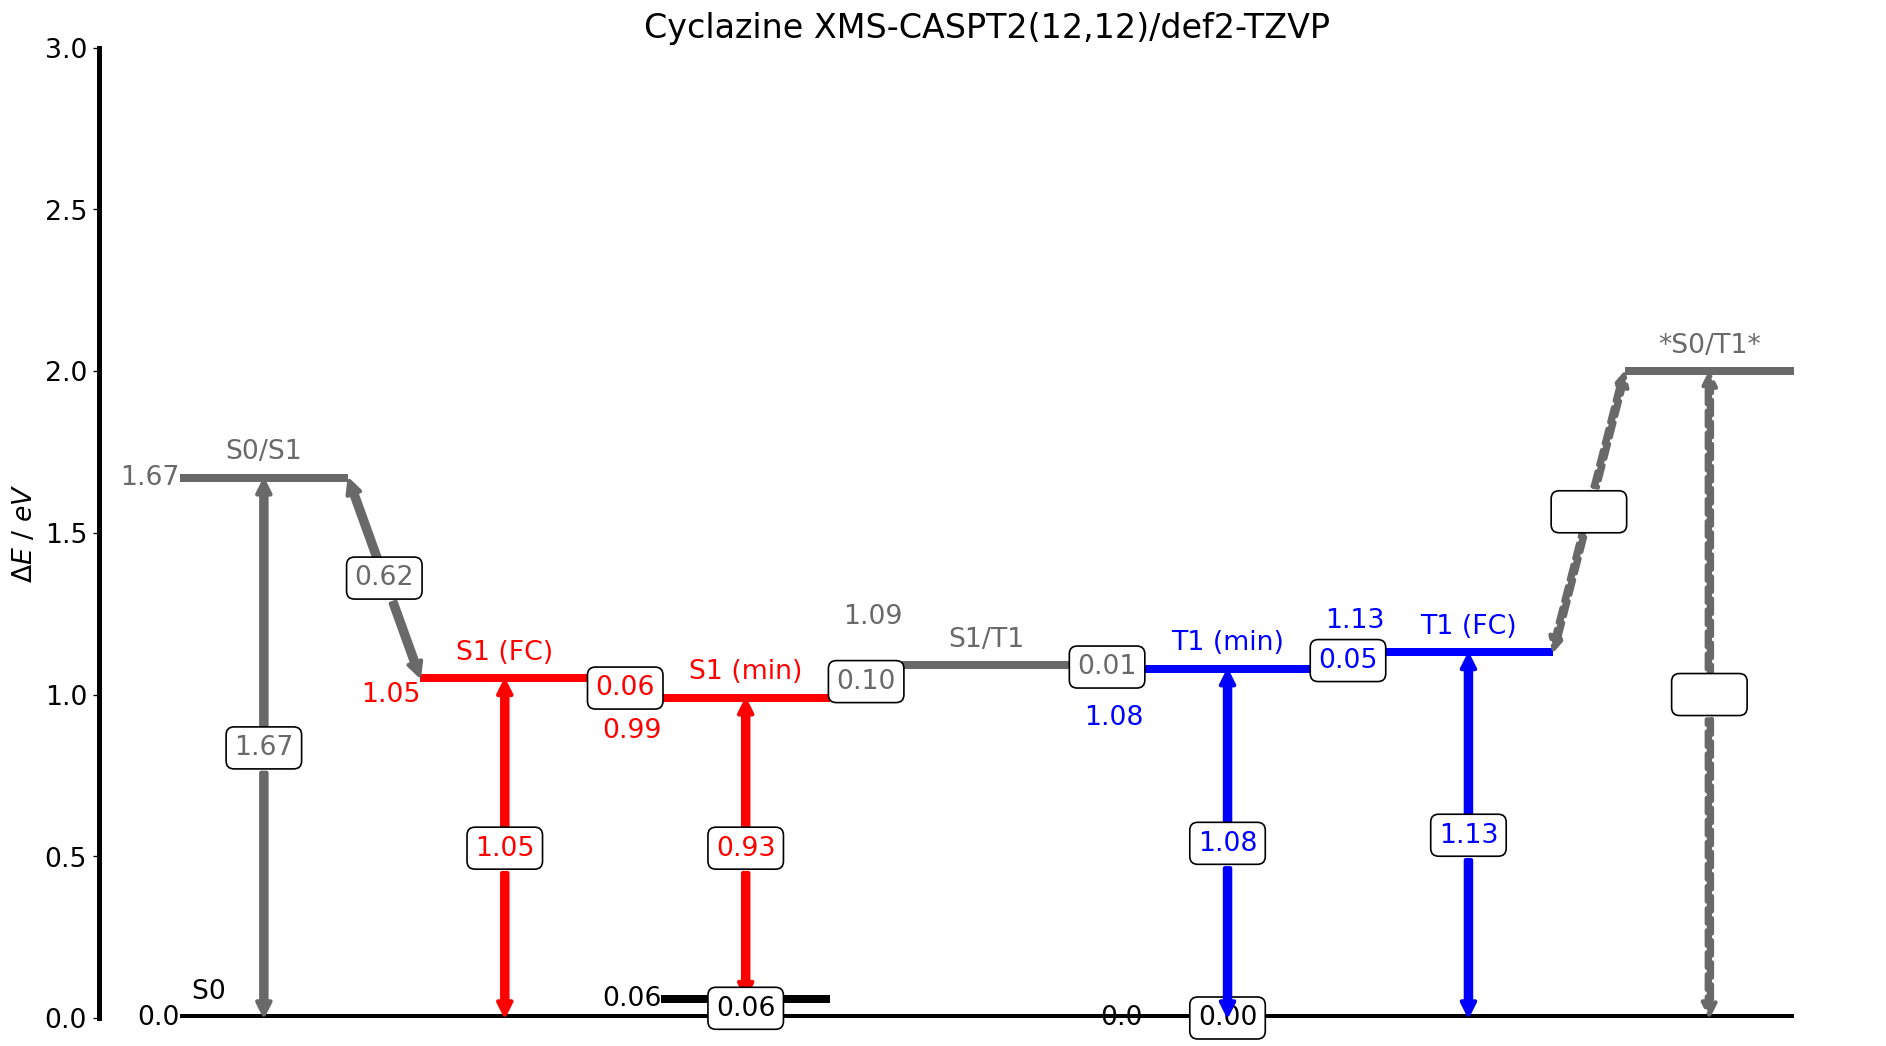

In [16]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [1.67, 1.05, 0.99, 0.06, 0.00, 1.09, 0.00, 1.08, 1.13, 2.00]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.10)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Cyclazine XMS-CASPT2(12,12)/def2-TZVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 3)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('mz-xms-tzvp.png', facecolor='white', transparent=False, bbox_inches='tight')

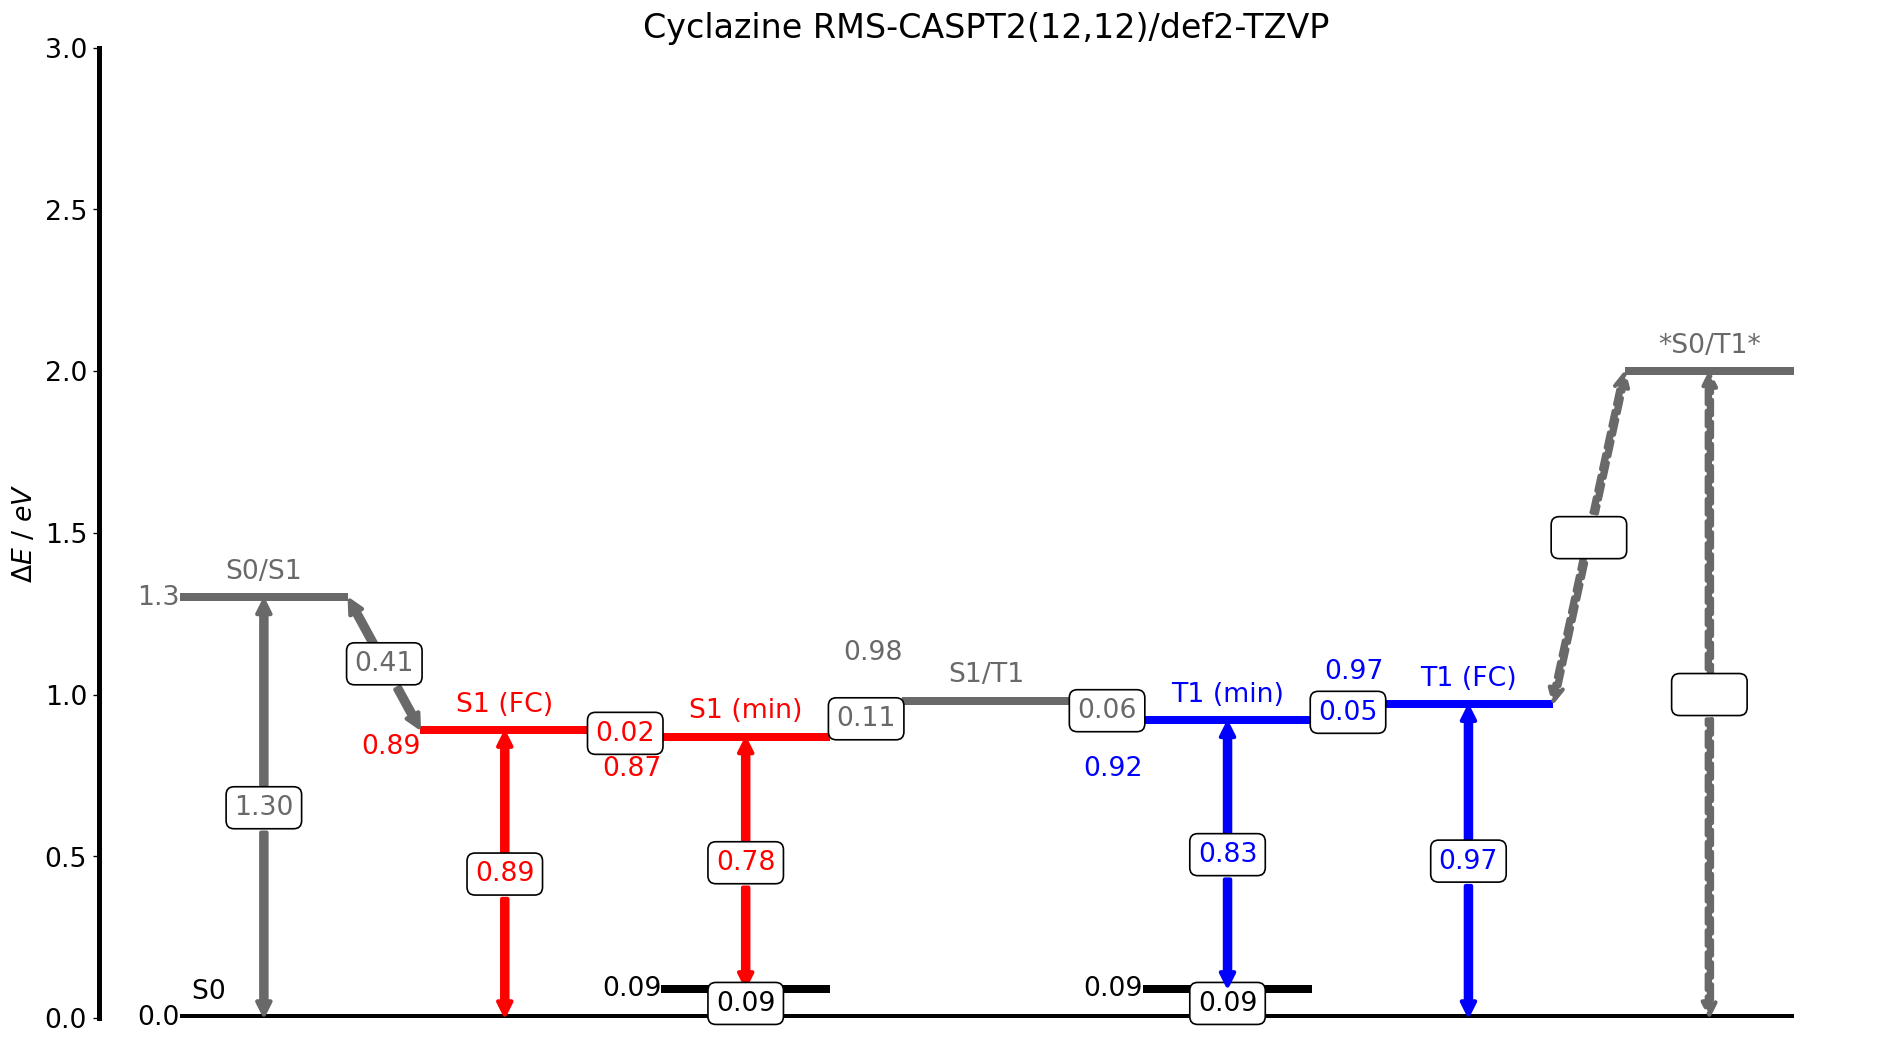

In [15]:
# S0S1, S1FC, S1min, S1@S0, 0.00, S1/T1, T1@S0, T1min, T1FC, S0/T1
energies = [1.30, 0.89, 0.87, 0.09, 0.00, 0.98, 0.09, 0.92, 0.97, 2.00]

diagram = ED(hline_linewidth=4.8, color_bottom_text='black')

diagram.add_level(energies[0], top_text='S0/S1', left_text='{}'.format(energies[0]), color='dimgray')
diagram.add_level(energies[4], position='l', top_text='S0             ', left_text='{}'.format(energies[4]), color='black')
diagram.add_level(energies[1], top_text='S1 (FC)', left_text='{}'.format(energies[1]), color='red', left_offset=-0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[2], top_text='S1 (min)', left_text='{}'.format(energies[2]), color='red', left_offset=-0.10)
diagram.add_level(energies[3], position='l', top_text='', left_text='{}'.format(energies[3]), color='black')
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[4], top_text='', left_text='', color='black')
diagram.add_level(energies[5], position='l', top_text='S1/T1', left_text='{}'.format(energies[5]), color='dimgray', left_offset=0.15)
diagram.add_level(energies[6], top_text='', left_text='{}'.format(energies[6]), color='black')
diagram.add_level(energies[7], position='l', top_text='T1 (min)', left_text='{}'.format(energies[7]), color='blue', left_offset=-0.15)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[8], top_text='T1 (FC)', left_text='{}'.format(energies[8]), color='blue', left_offset=0.10)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')
diagram.add_level(energies[9], top_text='*S0/T1*', left_text='', color='dimgray', left_offset=0.05)
diagram.add_level(energies[4], position='l', top_text='', left_text='', color='black')

diagram.add_link(1,3, ls='-', linewidth=4.8)
diagram.add_link(1,6, ls='-', linewidth=4.8)
diagram.add_link(6,7, ls='-', linewidth=4.8)
diagram.add_link(7,11, ls='-', linewidth=4.8)
diagram.add_link(11,13, ls='-', linewidth=4.8)
diagram.add_link(13,15, ls='-', linewidth=4.8)
diagram.add_arrow(0,1, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(2,3, arrow_color='red', width=2.5, text_color='red')
diagram.add_linked_arrow(0,2, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(2,4, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(4,5, arrow_color='red', width=2.5, text_color='red')
diagram.add_arrow(5,6, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(4,8, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_linked_arrow(8,10, arrow_color='dimgray', width=2.5, text_color='dimgray')
diagram.add_arrow(10,9, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(9,11, arrow_color='black', width=2.5, text_color='black')
diagram.add_linked_arrow(10,12, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_linked_arrow(12,14, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')
diagram.add_arrow(12,13, arrow_color='blue', width=2.5, text_color='blue')
diagram.add_arrow(14,15, arrow_color='dimgray', width=2.5, text_color='white', linestyle='--')


fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.setp(ax.spines.values(), linewidth=3)
plt.rc('font', size=16)
plt.rc('axes', titlesize=20)
ax.set_title('Cyclazine RMS-CASPT2(12,12)/def2-TZVP')
diagram.plot(ylabel="$\Delta E$ / $eV$", ax=ax, show_IDs=False) # this is the default ylabel
ax.set_ylim(0, 3)
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('mz-rms-tzvp.png', facecolor='white', transparent=False, bbox_inches='tight')